# Stan installation

In [1]:
# Install cmdstanpy module
!pip install cmdstanpy

# Install arviz module (With version 2.33.1 you will need a special version of arviz)
!pip install git+https://github.com/OriolAbril/arviz.git@ci

# Install cmdstan -- Just for the first time!
from cmdstanpy import install_cmdstan
install_cmdstan(compiler=True)

!pip install --upgrade arviz
!pip install --upgrade cmdstanpy

  Cloning https://github.com/OriolAbril/arviz.git (to revision ci) to /tmp/pip-req-build-wa1wntwu
  Running command git clone --filter=blob:none --quiet https://github.com/OriolAbril/arviz.git /tmp/pip-req-build-wa1wntwu
  Running command git checkout -b ci --track origin/ci
  Switched to a new branch 'ci'
  Branch 'ci' set up to track remote branch 'ci' from 'origin'.
  Resolved https://github.com/OriolAbril/arviz.git to commit 7c20182c25b0b5e9af8242d1ee4d1185ae82b70a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for arviz: filename=arviz-0.17.0.dev0-py3-none-any.whl size=1651459 sha256=e1ad0f1f791e9e63c412711edc22b96c7858be0281ba000abb5adffb6af516df
  Stored in directory: /tmp/pip-ephem-wheel-cache-ihhmbi3j/wheels/46/1e/6c/46b9c646a79d4a0f01b37df1c2c0abcc4e7129fe66e88e9b0f
Successfully built arviz
  Attempting uninstall: arviz
    Found existing installation: arviz 0.15.1
    Unin

DEBUG:cmdstanpy:cmd: make build -j1
cwd: None


Unpacked download as cmdstan-2.34.1
Building version cmdstan-2.34.1, may take several minutes, depending on your system.


DEBUG:cmdstanpy:cmd: make examples/bernoulli/bernoulli
cwd: None


Installed cmdstan-2.34.1
Test model compilation
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: arviz
    Found existing installation: arviz 0.17.0.dev0
    Uninstalling arviz-0.17.0.dev0:
      Successfully uninstalled arviz-0.17.0.dev0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import os

from cmdstanpy import CmdStanModel
from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

# Create ./stan folder if does not exists
if not os.path.exists("/content/drive/My Drive/Bayesian/stan"):
    os.mkdir("/content/drive/My Drive/Bayesian/stan")

# Data preparation:

Consider just the first sensor in the dataset, 3 features, rural/non rural

In [11]:
data = pd.read_csv('/content/drive/My Drive/Bayesian/All_values_Clean.csv')
data.head(5)

# Identify rows with '???' in any column
rows_to_remove = data[data.eq('???').any(axis=1)]

# Remove rows with '???' from the DataFrame
data = data[~data.eq('???').any(axis=1)]

# If you want to reset the index after removing rows
data.reset_index(drop=True, inplace=True)

In [12]:
data['area2'] = data['area'].apply(lambda x: 1 if x in ['U', 'S'] else 0)
data.head()

Unnamed: 0  Id_sensor         Time       NOx  max_wind10  avg_wind10  \
0        7145       6204   gennaio 16  5.094537   -0.883564   -1.033000   
1        7146       6204  febbraio 16  4.847209   -0.160893   -0.054538   
2        7147       6204     marzo 16  3.911859    0.257496   -0.447750   
3        7148       6204    aprile 16  3.763297   -0.984991   -0.200262   
4        7149       6204    maggio 16  3.808000   -0.718744   -0.524298   

   max_wind100  avg_wind100  max_humidity  avg_humidity  ...  cos12   sin6  \
0    -0.448047    -0.632854      0.614262      0.775022  ...  0.866  0.866   
1     0.083888     0.459680     -0.152361      0.826117  ...  0.500  0.866   
2     0.367014    -0.273935     -0.152361      0.137046  ...  0.000  0.000   
3    -0.928504    -0.113883     -1.685606     -0.319251  ... -0.500 -0.866   
4    -0.413729    -0.419238     -0.152361     -0.147897  ... -0.866 -0.866   

   cos6  sin4  cos4   sin3  cos3        lat      lng  area2  
0   0.5     1     0  0.866  -0.5  45.519335  9.59201      1  
1  -0.5     0    -1 -0.866  -0.5  45.519335  9.59201      1  
2  -1.0    -1     0  0.000   1.0  45.519335  9.59201      1  
3  -0.5     0     1  0.866  -0.5  45.519335  9.59201      1  
4   0.5     1     0 -0.866  -0.5  45.519335  9.59201      1  

[5 rows x 30 columns]

plot by area

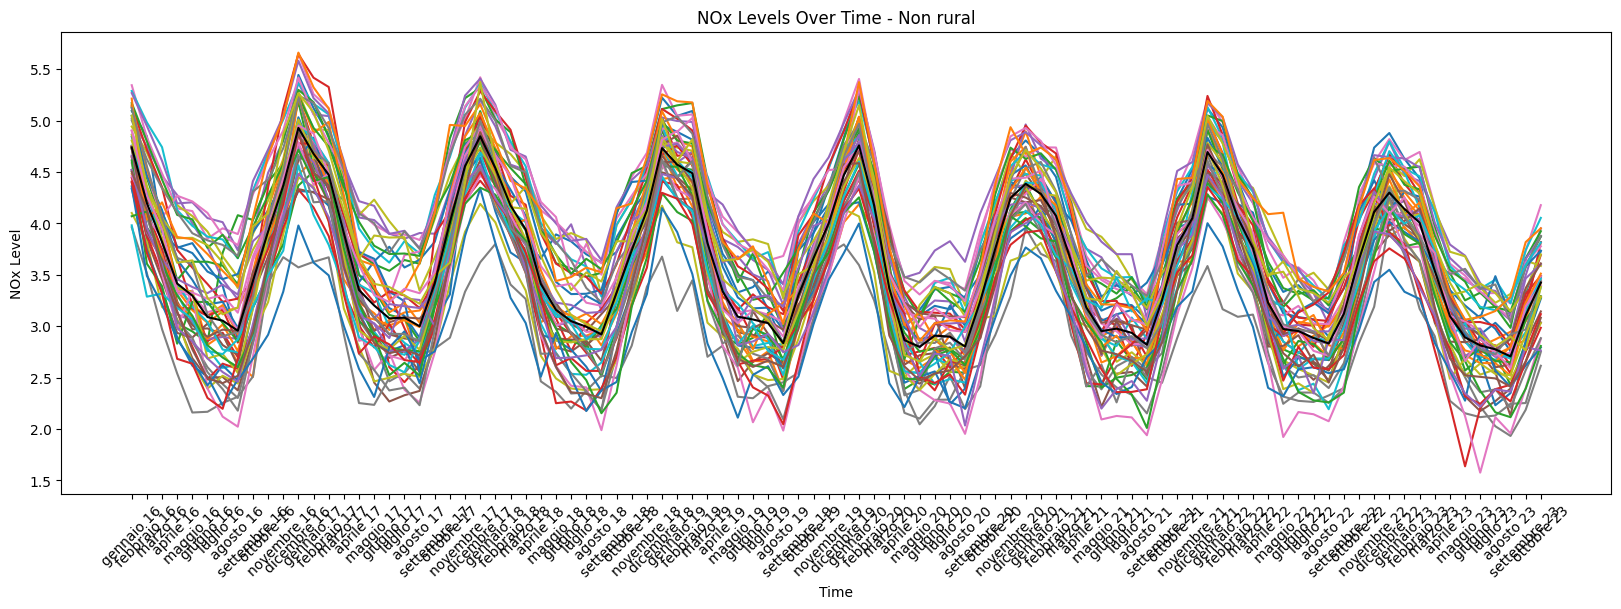

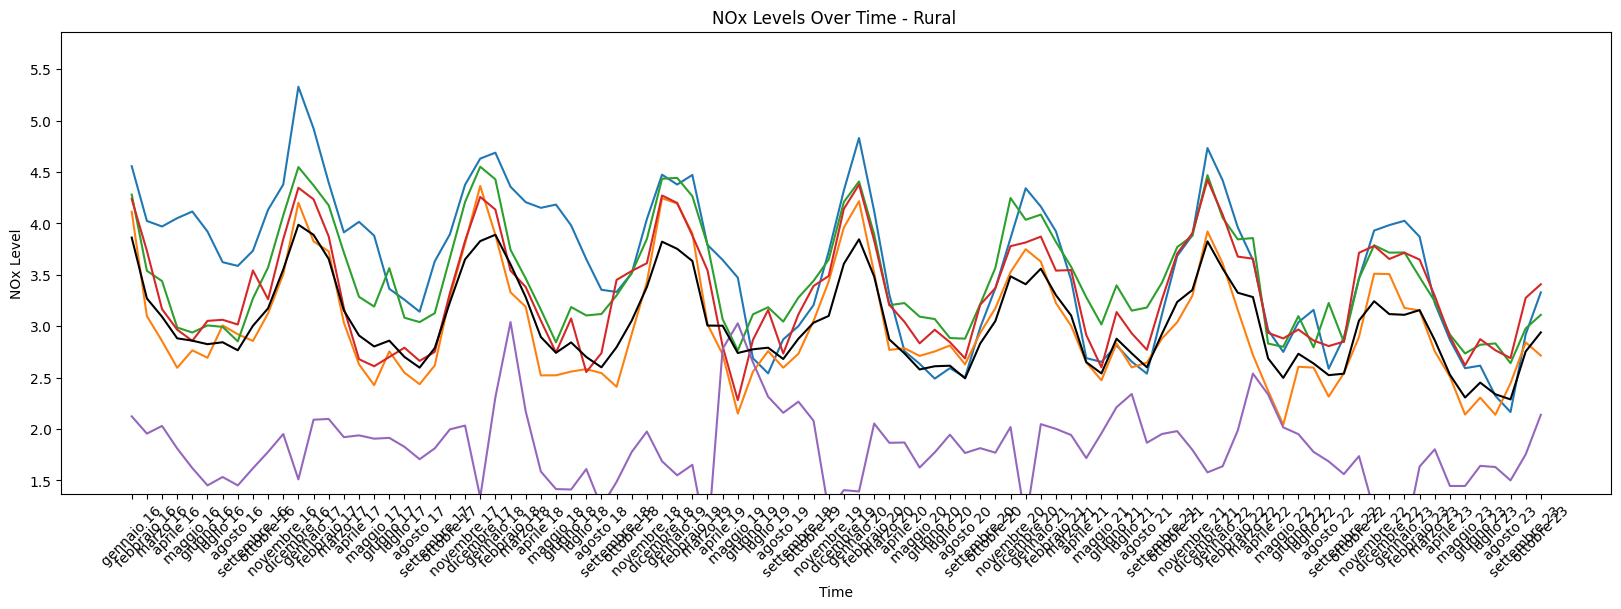

In [13]:
# Define custom month order
month_order = [
    'gennaio 16', 'febbraio 16', 'marzo 16', 'aprile 16', 'maggio 16', 'giugno 16', 'luglio 16', 'agosto 16',
    'settembre 16', 'ottobre 16', 'novembre 16', 'dicembre 16', 'gennaio 17', 'febbraio 17', 'marzo 17',
    'aprile 17', 'maggio 17', 'giugno 17', 'luglio 17', 'agosto 17', 'settembre 17', 'ottobre 17', 'novembre 17',
    'dicembre 17', 'gennaio 18', 'febbraio 18', 'marzo 18', 'aprile 18', 'maggio 18', 'giugno 18', 'luglio 18',
    'agosto 18', 'settembre 18', 'ottobre 18', 'novembre 18', 'dicembre 18', 'gennaio 19', 'febbraio 19', 'marzo 19',
    'aprile 19', 'maggio 19', 'giugno 19', 'luglio 19', 'agosto 19', 'settembre 19', 'ottobre 19', 'novembre 19',
    'dicembre 19', 'gennaio 20', 'febbraio 20', 'marzo 20', 'aprile 20', 'maggio 20', 'giugno 20', 'luglio 20',
    'agosto 20', 'settembre 20', 'ottobre 20', 'novembre 20', 'dicembre 20', 'gennaio 21', 'febbraio 21', 'marzo 21',
    'aprile 21', 'maggio 21', 'giugno 21', 'luglio 21', 'agosto 21', 'settembre 21', 'ottobre 21', 'novembre 21',
    'dicembre 21', 'gennaio 22', 'febbraio 22', 'marzo 22', 'aprile 22', 'maggio 22', 'giugno 22', 'luglio 22',
    'agosto 22', 'settembre 22', 'ottobre 22', 'novembre 22', 'dicembre 22', 'gennaio 23', 'febbraio 23', 'marzo 23',
    'aprile 23', 'maggio 23', 'giugno 23', 'luglio 23', 'agosto 23', 'settembre 23', 'ottobre 23'
]

# Convert 'Time' column to categorical with custom month order
data['Time'] = pd.Categorical(data['Time'], categories=month_order, ordered=True)

# Filter data for each area
area_1_data = data[data['area2'] == 1]
area_0_data = data[data['area2'] ==  0]

plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in area_1_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['NOx'], label=f'Sensor {sensor_id}')

# Calculate mean
mean_no2_area_1 = area_1_data.groupby('Time')['NOx'].mean()
plt.plot(mean_no2_area_1.index, mean_no2_area_1, color='black', label='Mean')

plt.title('NOx Levels Over Time - Non rural')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Get y-axis limits
ymin, ymax = plt.ylim()

plt.show()

# Plotting for Area 0
plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in area_0_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['NOx'], label=f'Sensor {sensor_id}')

# Calculate mean
mean_no2_area_0 = area_0_data.groupby('Time')['NOx'].mean()
plt.plot(mean_no2_area_0.index, mean_no2_area_0, color='black', label='Mean')

plt.title('NOx Levels Over Time - Rural ')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set y-axis limits
plt.ylim(ymin, ymax)

plt.show()


In [14]:
# Define the mapping dictionary
mapping = {'T': 1, 'I': 1, 'B': 0}

# Replace values in the 'area' column
data['type'] = data['type'].replace(mapping)

In [15]:
column_names = data.columns
column_names

Index(['Unnamed: 0', 'Id_sensor', 'Time', 'NOx', 'max_wind10', 'avg_wind10',
       'max_wind100', 'avg_wind100', 'max_humidity', 'avg_humidity',
       'max_precipitation', 'avg_precipitation', 'max_temperature',
       'avg_temperature', 'min_temperature', 'k_precipitation', 'k_wind10',
       'type', 'area', 'sin12', 'cos12', 'sin6', 'cos6', 'sin4', 'cos4',
       'sin3', 'cos3', 'lat', 'lng', 'area2'],
      dtype='object')

In [16]:
data

Unnamed: 0  Id_sensor          Time       NOx  max_wind10  avg_wind10  \
0           7145       6204    gennaio 16  5.094537   -0.883564   -1.033000   
1           7146       6204   febbraio 16  4.847209   -0.160893   -0.054538   
2           7147       6204      marzo 16  3.911859    0.257496   -0.447750   
3           7148       6204     aprile 16  3.763297   -0.984991   -0.200262   
4           7149       6204     maggio 16  3.808000   -0.718744   -0.524298   
...          ...        ...           ...       ...         ...         ...   
5071        1594      30162     giugno 23  2.918380   -0.211607    0.039585   
5072        1595      30162     luglio 23  2.802844    1.157665    0.046664   
5073        1596      30162     agosto 23  2.899084    1.119629    0.543884   
5074        1597      30162  settembre 23  2.765598    0.282852   -0.265388   
5075        1598      30162    ottobre 23  3.381531    1.068916    0.379817   

      max_wind100  avg_wind100  max_humidity  avg_humidity  ...  cos12   sin6  \
0       -0.448047    -0.632854      0.614262      0.775022  ...  0.866  0.866   
1        0.083888     0.459680     -0.152361      0.826117  ...  0.500  0.866   
2        0.367014    -0.273935     -0.152361      0.137046  ...  0.000  0.000   
3       -0.928504    -0.113883     -1.685606     -0.319251  ... -0.500 -0.866   
4       -0.413729    -0.419238     -0.152361     -0.147897  ... -0.866 -0.866   
...           ...          ...           ...           ...  ...    ...    ...   
5071    -0.104864    -0.133968     -2.452228     -0.758059  ... -1.000  0.000   
5072     0.924688    -0.093503     -0.918983     -0.588039  ... -0.866  0.866   
5073     1.156337     0.393464     -1.685606     -1.492861  ... -0.500  0.866   
5074     0.186843    -0.427697     -2.452228     -0.488815  ...  0.000  0.000   
5075     1.122018     0.396735      0.614262      0.228141  ...  0.500 -0.866   

      cos6  sin4  cos4   sin3  cos3        lat        lng  area2  
0      0.5     1     0  0.866  -0.5  45.519335   9.592010      1  
1     -0.5     0    -1 -0.866  -0.5  45.519335   9.592010      1  
2     -1.0    -1     0  0.000   1.0  45.519335   9.592010      1  
3     -0.5     0     1  0.866  -0.5  45.519335   9.592010      1  
4      0.5     1     0 -0.866  -0.5  45.519335   9.592010      1  
...    ...   ...   ...    ...   ...        ...        ...    ...  
5071   1.0     0    -1  0.000   1.0  45.513039  10.191942      1  
5072   0.5    -1     0  0.866  -0.5  45.513039  10.191942      1  
5073  -0.5     0     1 -0.866  -0.5  45.513039  10.191942      1  
5074  -1.0     1     0  0.000   1.0  45.513039  10.191942      1  
5075  -0.5     0    -1  0.866  -0.5  45.513039  10.191942      1  

[5076 rows x 30 columns]

In [17]:
#data = data[data['Id_sensor'] == 6204]
#data.head()

In [18]:
columns_to_keep = ['Id_sensor','Time', 'NOx', 'avg_wind10','avg_humidity','avg_precipitation','avg_temperature', 'type']

# Select only the specified columns
data = data[columns_to_keep]


In [19]:
data.head()

Id_sensor         Time       NOx  avg_wind10  avg_humidity  \
0       6204   gennaio 16  5.094537   -1.033000      0.775022   
1       6204  febbraio 16  4.847209   -0.054538      0.826117   
2       6204     marzo 16  3.911859   -0.447750      0.137046   
3       6204    aprile 16  3.763297   -0.200262     -0.319251   
4       6204    maggio 16  3.808000   -0.524298     -0.147897   

   avg_precipitation  avg_temperature  type  
0          -0.924117        -1.477609     1  
1           0.921431        -1.064318     1  
2          -0.462942        -0.804922     1  
3          -0.648766        -0.121794     1  
4           1.142467         0.176097     1

In [20]:
num_unique_id_sensor = data['Id_sensor'].nunique()
num_unique_id_sensor

54

In [21]:
data.shape[0]/num_unique_id_sensor

94.0

In [22]:
import pandas as pd

# Creazione della sequenza
t_values = [i for i in range(1, 95)] * 54

# Aggiunta della colonna al DataFrame
data['t'] = t_values

data.head()

<ipython-input-22-01bdb30b1163>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['t'] = t_values


Id_sensor         Time       NOx  avg_wind10  avg_humidity  \
0       6204   gennaio 16  5.094537   -1.033000      0.775022   
1       6204  febbraio 16  4.847209   -0.054538      0.826117   
2       6204     marzo 16  3.911859   -0.447750      0.137046   
3       6204    aprile 16  3.763297   -0.200262     -0.319251   
4       6204    maggio 16  3.808000   -0.524298     -0.147897   

   avg_precipitation  avg_temperature  type  t  
0          -0.924117        -1.477609     1  1  
1           0.921431        -1.064318     1  2  
2          -0.462942        -0.804922     1  3  
3          -0.648766        -0.121794     1  4  
4           1.142467         0.176097     1  5

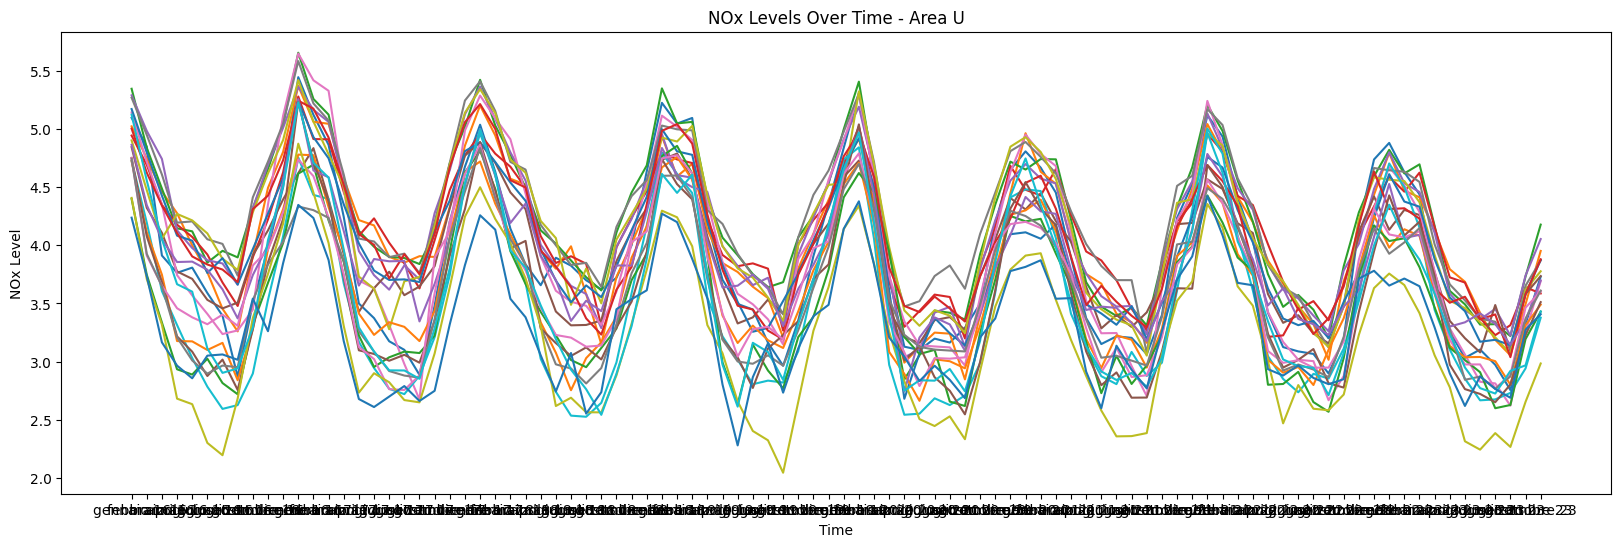

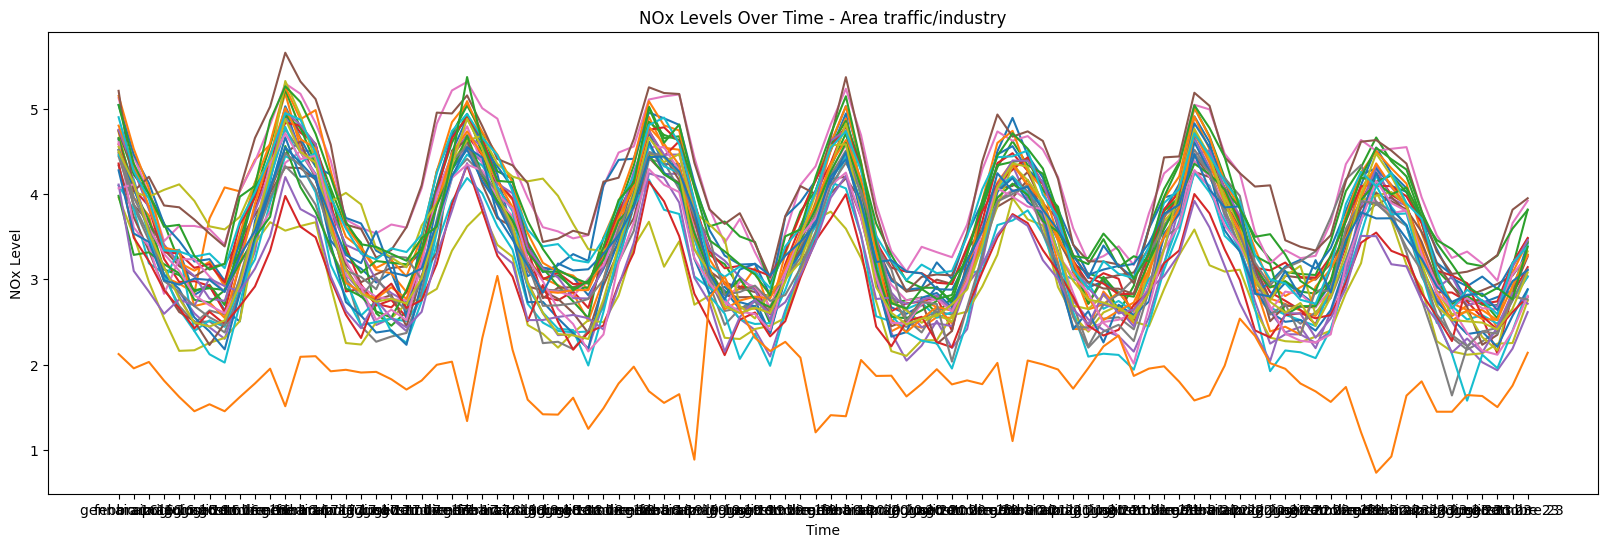

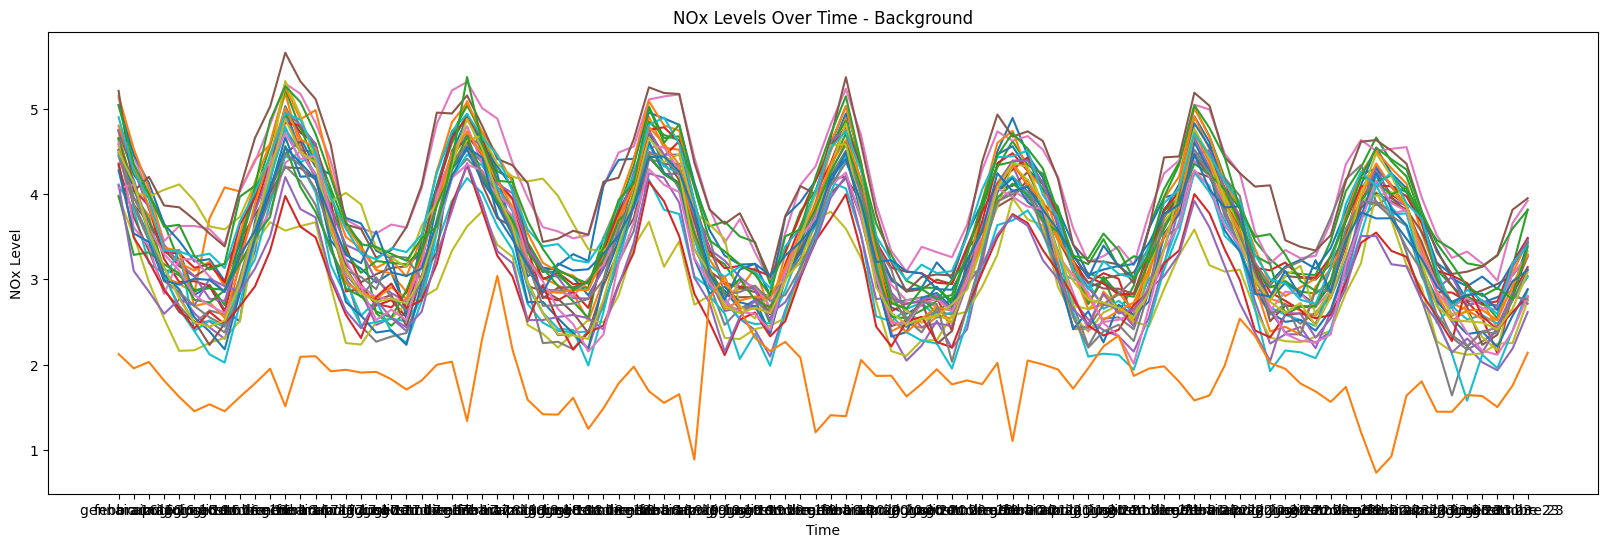

In [23]:

# Filter data for each area
area_1_data = data[data['type'] == 1]
area_0_data = data[data['type'] ==  0]

plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in area_1_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['NOx'], label=f'Sensor {sensor_id}')

plt.title('NOx Levels Over Time - Area U')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.show()

plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in area_0_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['NOx'], label=f'Sensor {sensor_id}')

plt.title('NOx Levels Over Time - Area traffic/industry')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.show()

# Plotting for Area S
plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in area_0_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['NOx'], label=f'Sensor {sensor_id}')

plt.title('NOx Levels Over Time - Background')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.show()


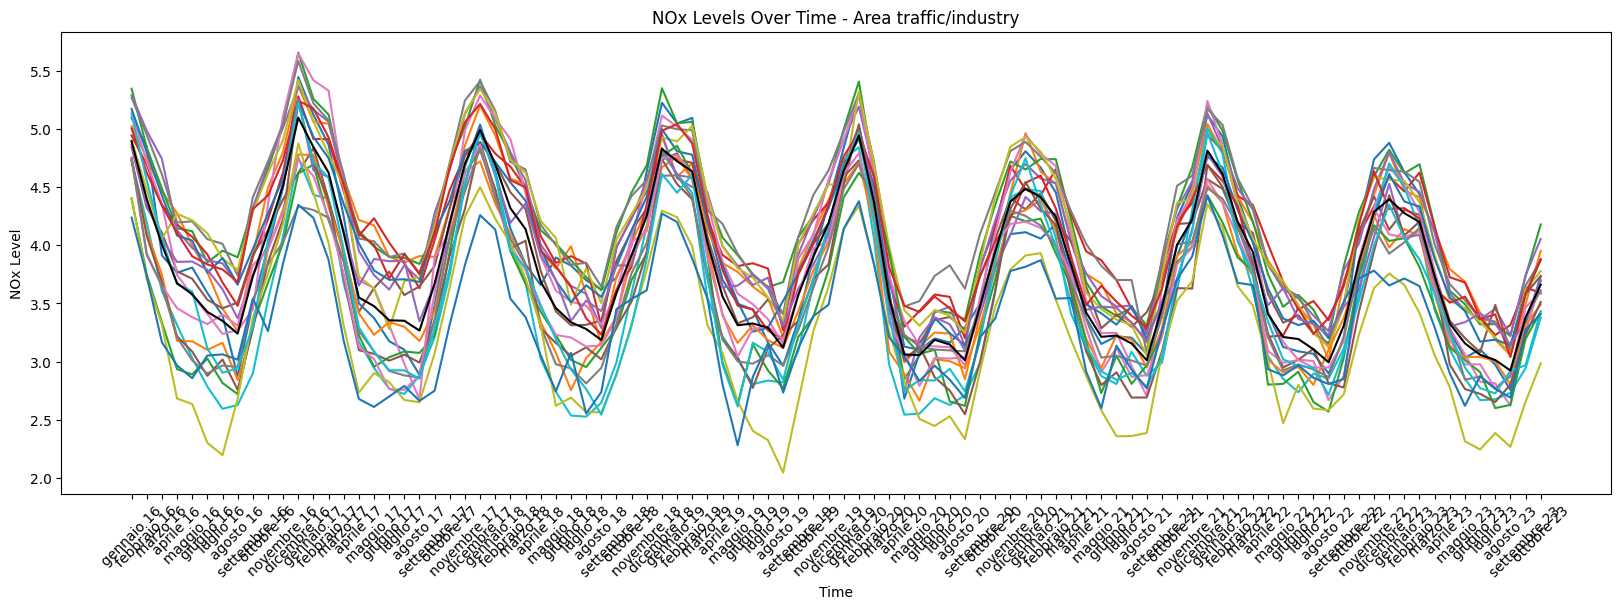

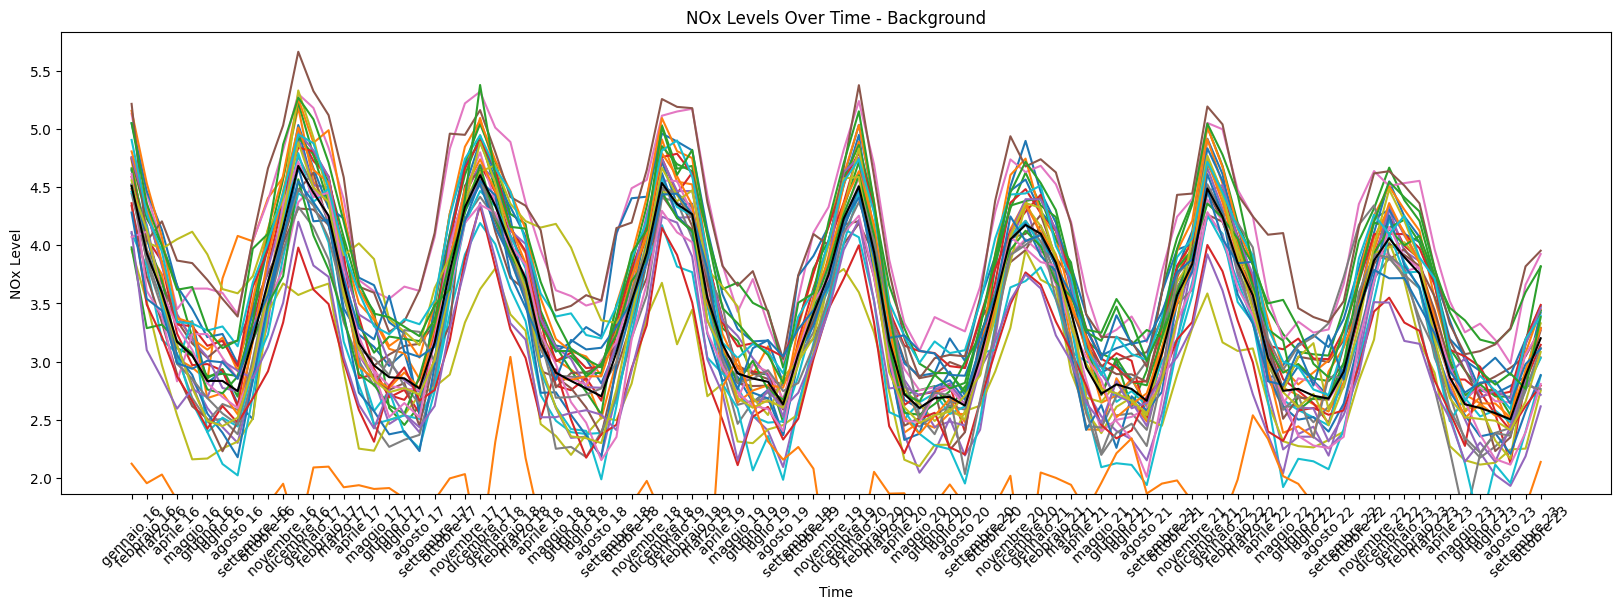

In [24]:
# Filter data for each area
area_1_data = data[data['type'] == 1]
area_0_data = data[data['type'] ==  0]

plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in area_1_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['NOx'], label=f'Sensor {sensor_id}')

# Calculate mean
mean_no2_area_1 = area_1_data.groupby('Time')['NOx'].mean()
plt.plot(mean_no2_area_1.index, mean_no2_area_1, color='black', label='Mean')

plt.title('NOx Levels Over Time - Area traffic/industry')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Get y-axis limits
ymin, ymax = plt.ylim()

plt.show()

# Plotting for Area 0
plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in area_0_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['NOx'], label=f'Sensor {sensor_id}')

# Calculate mean
mean_no2_area_0 = area_0_data.groupby('Time')['NOx'].mean()
plt.plot(mean_no2_area_0.index, mean_no2_area_0, color='black', label='Mean')

plt.title('NOx Levels Over Time - Background')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set y-axis limits
plt.ylim(ymin, ymax)

plt.show()


# Model 1 Frigeri

In [14]:
model2='''

// una stazione alla volta (cioè una serie storica alla volta)

functions {

    // Computes the marginal likelihood lpdf  vector compute_logp
    vector compute_logp(vector obs, vector early_rate, vector late_rate,real sigma) {

        // Deduce size of data and uniform contribution
        int T = size(obs);
        real log_unif = -log(T);

        // Compute contributions for log_sum_exp
        vector[T] lp = rep_vector(log_unif, T);
        for (s in 1:T) {
            for (t in 1:T) {
                lp[s] += normal_lpdf(obs[t] | t < s ? early_rate[t] : late_rate[t], sigma);
            }
        }

        // Return the value of the lpdf
        return lp;
    }

    // Computes the vector of probabilites for the posterior distribution of s vector compute_probs(vector lp)
    vector compute_probs(vector lp) {
        return softmax(lp);
    }

    // Computes the marginal likelihood lpdf
    real marginal_likelihood_logpdf(vector lp){
        return log_sum_exp(lp);
    }
}


data {
    // int<lower=1> N_obs_tot; // 54*94
    int<lower=1> p; //4
    //int<lower=1> N_staz; //54
    int<lower=1> N_obs; // 94
    vector[N_obs] Y_obs;
    vector[N_obs] t_obs; //1:94
    //vector [N_obs_tot] T_OBS;  //t
    //vector[N_obs] ID_obs; //unique ID_obs
    matrix[N_obs, p] X;
    vector[N_obs] r; //area
    real omega;
}
parameters {
    real<lower=0> sigma_sq;
    vector[p] betas;
    vector[2] a;
    vector[2] b;
    real c_e;
    real c_l;

    vector[2] a_r;
    vector[2] b_r;
    real c_r_e;
    real c_r_l;
}

transformed parameters {
    real<lower=0> sigma = sqrt(sigma_sq);

    vector[N_obs] ft_early;
    ft_early = rep_vector(c_e, N_obs);
    ft_early += a[1] * sin(omega * t_obs) + b[1] * cos(omega * t_obs);
    ft_early += a[2] * sin(4 * omega * t_obs) + b[2] * cos(4 * omega * t_obs);

    vector[N_obs] ft_r_early;
    ft_r_early = rep_vector(c_r_e, N_obs);
    ft_r_early += a_r[1] * sin(omega * t_obs) + b_r[1] * cos(omega * t_obs);
    ft_r_early += a_r[2] * sin(4 * omega * t_obs) + b_r[2] * cos(4 * omega * t_obs);

    vector[N_obs] ft_late;
    ft_late = rep_vector(c_l, N_obs);
    ft_late += a[1] * sin(omega * t_obs) + b[1] * cos(omega * t_obs);
    ft_late += a[2] * sin(4 * omega * t_obs) + b[2] * cos(4 * omega * t_obs);

    vector[N_obs] ft_r_late;
    ft_r_late = rep_vector(c_r_l, N_obs);
    ft_r_late += a_r[1] * sin(omega * t_obs) + b_r[1] * cos(omega * t_obs);
    ft_r_late += a_r[2] * sin(4 * omega * t_obs) + b_r[2] * cos(4 * omega * t_obs);


    vector[N_obs] mu_obs_early;
    mu_obs_early[1:N_obs] = r[1:N_obs] .* ft_r_early[1:N_obs] + (1 - r[1:N_obs]) .* ft_early[1:N_obs];
    mu_obs_early[1:N_obs] += X[1:N_obs] * betas;

    vector[N_obs] mu_obs_late;
    mu_obs_late[1:N_obs] = r[1:N_obs] .* ft_r_late[1:N_obs] + (1 - r[1:N_obs]) .* ft_late[1:N_obs];
    mu_obs_late[1:N_obs] += X[1:N_obs] * betas;

}

model {
    sigma_sq ~ inv_gamma(3, 2);
    betas ~ normal(0, 2);
    a ~ normal(0, 1);
    b ~ normal(0, 1);
    c_e ~ normal(0, 1);
    a_r ~ normal(0, 1);
    b_r ~ normal(0, 1);
    c_l ~ normal(0, 1);
    c_r_e ~ normal(0, 1);
    c_r_l ~ normal(0, 1);


    target += marginal_likelihood_logpdf(compute_logp(Y_obs, mu_obs_early, mu_obs_late, sigma)); //target += marginal_likelihood_logpdf(compute_logp(y, e, l, sigma));
}

generated quantities {
    int<lower=1, upper=N_obs> s = categorical_rng(compute_probs(compute_logp(Y_obs, mu_obs_early, mu_obs_late, sigma))); //compute_probs(compute_logp(y,e,l, sigma)))
}



'''


# Write stan model to file
stan_file = "/content/drive/My Drive/Bayesian/stan/model2.stan"
with open(stan_file, "w") as f:
    print(model2, file=f)

# Compile stan model
model2 = CmdStanModel(stan_file=stan_file)

08:23:58 - cmdstanpy - INFO - compiling stan file /tmp/tmpijf1qgwn/tmp05k4m99z.stan to exe file /content/drive/My Drive/Bayesian/stan/model2
INFO:cmdstanpy:compiling stan file /tmp/tmpijf1qgwn/tmp05k4m99z.stan to exe file /content/drive/My Drive/Bayesian/stan/model2
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=model2.stan /tmp/tmpijf1qgwn/tmp05k4m99z
cwd: /root/.cmdstan/cmdstan-2.34.1
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=model2.stan --o=/tmp/tmpijf1qgwn/tmp05k4m99z.hpp /tmp/tmpijf1qgwn/tmp05k4m99z.stan

--- Compiling C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.81.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundial

# Some stations


In [15]:
import pandas as pd
import random

# Assuming you have a DataFrame named df with a column named 'Id_sensor'

# Generate a list of 4 random unique Id_sensor values
unique_id_sensors = data['Id_sensor'].unique()
random_id_sensors = random.sample(list(unique_id_sensors), 1)
model2 = CmdStanModel(stan_file=stan_file)

# Iterate over each random Id_sensor value
for id_sensor in random_id_sensors:
    subset_df = data[data['Id_sensor'] == id_sensor]

    cpc_data = {
    "N_obs": subset_df.shape[0],
    "p": 4,
    "Y_obs" : subset_df.NOx,
    "t_obs" : subset_df.t,
    "X" : subset_df.iloc[:, 3:7],
    "r": subset_df.type,
    "omega" : 2*3.14/12,
    "month": subset_df.t
    }

    # Algorithm parameters
    algo_params = {
        "n_chains": 4,
        "n_burnin": 1000,
        "n_iter": 5000
    }

    # Sample
    cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                      iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])
    # Convert to arviz data type
    chains = az.InferenceData(posterior=cpc_fit.draws_xr())
    s_chain = np.hstack(chains.posterior.s).astype(int)
    x, y = np.unique(s_chain, return_counts=True)
    print(y)
    print(id_sensor)
    print("Primo massimo: {0}".format(subset_df['Time'].iloc[x[y == y.max()]].to_numpy().squeeze()))
    sorted_indices = np.argsort(-y)
    # Seleziona il secondo massimo
    second_max_index = sorted_indices[1]
    print("Secondo massimo: {0}".format(subset_df['Time'].iloc[x[second_max_index]]))


DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9hx6tqn/ewxg0os5.json
16:03:39 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=24305', 'data', 'file=/tmp/tmph9hx6tqn/ewxg0os5.json', 'output', 'file=/tmp/tmph9hx6tqn/model2fcqak6gd/model2-20240211160339_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=24305', 'data', 'file=/tmp/tmph9hx6tqn/ewxg0os5.json', 'output', 'file=/tmp/tmph9hx6tqn/model2fcqak6gd/model2-20240211160339_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=24305', 'data', 'file=/tm

16:10:51 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=24305', 'data', 'file=/tmp/tmph9hx6tqn/ewxg0os5.json', 'output', 'file=/tmp/tmph9hx6tqn/model2fcqak6gd/model2-20240211160339_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmph9hx6tqn/model2fcqak6gd/model2-20240211160339_1.csv
 console_msgs (if any):
	/tmp/tmph9hx6tqn/model2fcqak6gd/model2-20240211160339_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)



[5228    1    3    1    6    2    1    2    2    1    2    3    5    2
    2    1    1    1    4    5    5   12   19   28   24   63   73   89
   85   64   58   74   82   63   84  156  315  414  435  290  390  872
  711  741  657  842 1381 2152 2156  408   94   56   63   82   57   62
   61   46   38   45   43   35   34   13   25   35   32   44   40   44
   33   36   47   66   36   60  132  177   81   45   45   85   42   14
   23   18    6   11    7   21   15   35]
6264
Primo massimo: febbraio 16
Secondo massimo: aprile 20


# All sensors.

N.b: do the same but FOR ALL the sensors

In [ ]:
import pandas as pd
import random

# Assuming you have a DataFrame named df with a column named 'Id_sensor'

# Generate a list of 4 random unique Id_sensor values
unique_id_sensors = data['Id_sensor'].unique()

model2 = CmdStanModel(stan_file=stan_file)

# Iterate over each random Id_sensor value
for id_sensor in unique_id_sensors:
    subset_df = data[data['Id_sensor'] == id_sensor]

    cpc_data = {
    "N_obs": subset_df.shape[0],
    "p": 4,
    "Y_obs" : subset_df.NOx,
    "t_obs" : subset_df.t,
    "X" : subset_df.iloc[:, 3:7],
    "r": subset_df.type,
    "omega" : 2*3.14/12,
    "month": subset_df.t
    }

    # Algorithm parameters
    algo_params = {
        "n_chains": 4,
        "n_burnin": 1000,
        "n_iter": 5000
    }

    # Sample
    cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                      iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])
    # Convert to arviz data type
    chains = az.InferenceData(posterior=cpc_fit.draws_xr())
    s_chain = np.hstack(chains.posterior.s).astype(int)
    x, y = np.unique(s_chain, return_counts=True)
    print(y)
    print(id_sensor)
    print("Primo massimo: {0}".format(subset_df['Time'].iloc[x[y == y.max()]].to_numpy().squeeze()))
    sorted_indices = np.argsort(-y)
    # Seleziona il secondo massimo
    second_max_index = sorted_indices[1]
    print("Secondo massimo: {0}".format(subset_df['Time'].iloc[x[second_max_index]]))



DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9hx6tqn/8t5v3cli.json
16:10:55 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=83009', 'data', 'file=/tmp/tmph9hx6tqn/8t5v3cli.json', 'output', 'file=/tmp/tmph9hx6tqn/model2olphrs67/model2-20240211161055_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=83009', 'data', 'file=/tmp/tmph9hx6tqn/8t5v3cli.json', 'output', 'file=/tmp/tmph9hx6tqn/model2olphrs67/model2-20240211161055_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=4', 'random', 'seed=830

16:19:11 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=83009', 'data', 'file=/tmp/tmph9hx6tqn/8t5v3cli.json', 'output', 'file=/tmp/tmph9hx6tqn/model2olphrs67/model2-20240211161055_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmph9hx6tqn/model2olphrs67/model2-20240211161055_1.csv
 console_msgs (if any):
	/tmp/tmph9hx6tqn/model2olphrs67/model2-20240211161055_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9hx6tqn/2cpmc0gw.json
16:19:15 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[19076     9     6     5     7     2     6     3     3     3     7     5
     1     7     3     1     3     5     2     3     1     6     1     4
     3     3     1     2     2     2     3     2     3     1     8     9
    12    11    13    14    35    34    26    11    11     9     8    27
    28    24     8     8    10     9    10     8    15     9     9     8
     8     5     2     3     2     4     5     6     3     7     3     3
     5     5     3     5    17    10    17    22    41    42    45    49
    31    21     7    22    12    19    11]
6204
Primo massimo: febbraio 16
Secondo massimo: aprile 23


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=37728', 'data', 'file=/tmp/tmph9hx6tqn/2cpmc0gw.json', 'output', 'file=/tmp/tmph9hx6tqn/model2ofjujux2/model2-20240211161915_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=37728', 'data', 'file=/tmp/tmph9hx6tqn/2cpmc0gw.json', 'output', 'file=/tmp/tmph9hx6tqn/model2ofjujux2/model2-20240211161915_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

16:26:38 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=37728', 'data', 'file=/tmp/tmph9hx6tqn/2cpmc0gw.json', 'output', 'file=/tmp/tmph9hx6tqn/model2ofjujux2/model2-20240211161915_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmph9hx6tqn/model2ofjujux2/model2-20240211161915_1.csv
 console_msgs (if any):
	/tmp/tmph9hx6tqn/model2ofjujux2/model2-20240211161915_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9hx6tqn/pirziy54.json
16:26:41 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[19408    18    18    10    17    10     9     4     8    32    49    46
    23    18    18    25    13    14    10     1     4     8     5     2
     2     3     3     1     5     4     1     3     3     3     3     3
     5     2     5     3     3     2     2     2     2     4     4    10
     3     2     4     5     3     5     1     1     3     3     2     3
     5     2     1     1     3     2     2     3     5     4     2     3
     3     6     3     7     2    10     4     7     3     2     3     4
     2     4     2     7     2     2     3     4     4]
6208
Primo massimo: febbraio 16
Secondo massimo: dicembre 16


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=24995', 'data', 'file=/tmp/tmph9hx6tqn/pirziy54.json', 'output', 'file=/tmp/tmph9hx6tqn/model2jb6vq501/model2-20240211162641_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=4', 'random', 'seed=24995', 'data', 'file=/tmp/tmph9hx6tqn/pirziy54.json', 'output', 'file=/tmp/tmph9hx6tqn/model2jb6vq501/model2-20240211162641_4.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=249

16:34:08 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=24995', 'data', 'file=/tmp/tmph9hx6tqn/pirziy54.json', 'output', 'file=/tmp/tmph9hx6tqn/model2jb6vq501/model2-20240211162641_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmph9hx6tqn/model2jb6vq501/model2-20240211162641_1.csv
 console_msgs (if any):
	/tmp/tmph9hx6tqn/model2jb6vq501/model2-20240211162641_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9hx6tqn/0a83hhlc.json
16:34:13 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    1    1   13   41   16   16    4    8   88  129  104  178  274
  404  553  793  245   57   59   67  131  160  549  520  359  323  651
 2603 1584  557  226  370  805 2560 4193  983  132   69   53   39   23
   16   11    3    6    4    3    2    1    1    1    1    1    1    1
    2    4]
6212
Primo massimo: aprile 20
Secondo massimo: settembre 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=55977', 'data', 'file=/tmp/tmph9hx6tqn/0a83hhlc.json', 'output', 'file=/tmp/tmph9hx6tqn/model2hk230faf/model2-20240211163413_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=55977', 'data', 'file=/tmp/tmph9hx6tqn/0a83hhlc.json', 'output', 'file=/tmp/tmph9hx6tqn/model2hk230faf/model2-20240211163413_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=4', 'random', 'seed=559

16:45:40 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=55977', 'data', 'file=/tmp/tmph9hx6tqn/0a83hhlc.json', 'output', 'file=/tmp/tmph9hx6tqn/model2hk230faf/model2-20240211163413_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmph9hx6tqn/model2hk230faf/model2-20240211163413_1.csv
 console_msgs (if any):
	/tmp/tmph9hx6tqn/model2hk230faf/model2-20240211163413_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9hx6tqn/6v9va506.json
16:45:45 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[19430    20    13     8     7     6     7     8     6     3     6     4
     6     4     5     4     3     3     7     3     1     2     6     3
    12     5     6     2    10    14    14    15     8     6    10     8
     9     8    15    20    13    12    11    31    14     8     5     8
     3     9     5     1     2     4     1     1     6     4     1     5
     2     4     1     4     3     3     2     4     4     2     3     5
     3     3     1     7     1     4     7     7    10     7     6     4
     7     3     5     3     5     9]
6218
Primo massimo: febbraio 16
Secondo massimo: settembre 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=15978', 'data', 'file=/tmp/tmph9hx6tqn/6v9va506.json', 'output', 'file=/tmp/tmph9hx6tqn/model2j59i62ce/model2-20240211164545_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=15978', 'data', 'file=/tmp/tmph9hx6tqn/6v9va506.json', 'output', 'file=/tmp/tmph9hx6tqn/model2j59i62ce/model2-20240211164545_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=159

16:52:34 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=15978', 'data', 'file=/tmp/tmph9hx6tqn/6v9va506.json', 'output', 'file=/tmp/tmph9hx6tqn/model2j59i62ce/model2-20240211164545_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmph9hx6tqn/model2j59i62ce/model2-20240211164545_1.csv
 console_msgs (if any):
	/tmp/tmph9hx6tqn/model2j59i62ce/model2-20240211164545_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9hx6tqn/0y2pquf3.json
16:52:37 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[6017    1    1    1   10   10   68   39   56  149  440  632  248  253
  223  277 1699 2762  750  408  468  212  310  218  217  210  183  192
  403  720  353  276  311  383  449  461  532   48    4    1    2    1
    1    1]
6220
Primo massimo: febbraio 16
Secondo massimo: settembre 18


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=80593', 'data', 'file=/tmp/tmph9hx6tqn/0y2pquf3.json', 'output', 'file=/tmp/tmph9hx6tqn/model26u_c5d3s/model2-20240211165238_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=80593', 'data', 'file=/tmp/tmph9hx6tqn/0y2pquf3.json', 'output', 'file=/tmp/tmph9hx6tqn/model26u_c5d3s/model2-20240211165238_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=80593', 'data', 'file=/tm

17:07:02 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=80593', 'data', 'file=/tmp/tmph9hx6tqn/0y2pquf3.json', 'output', 'file=/tmp/tmph9hx6tqn/model26u_c5d3s/model2-20240211165238_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmph9hx6tqn/model26u_c5d3s/model2-20240211165238_1.csv
 console_msgs (if any):
	/tmp/tmph9hx6tqn/model26u_c5d3s/model2-20240211165238_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


17:07:03 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 1 divergent transitions (0.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 3 had 1 divergent transitions (0.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9hx6tqn/obimy8tg.json
17:07:07 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[3276    5    1    2    6    1    2    2    2    4    1    2    3    4
    4    7    6   12    4   13    8    6    7    8    8   10   14    5
    8    8    7   15   17   16   20   13   19   25   47   77   76   66
  124  256  215  140  153  169  191  389  534  155   54   38   32   53
   42   25   26   24   28   25   39   34   20   31   71  294  186  221
  229  178  314  362  341  148  151  247  594 2492 3173 1717  856  842
  382  121   88   36   15   21   49  135   48   55]
6230
Primo massimo: febbraio 16
Secondo massimo: ottobre 22


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=40147', 'data', 'file=/tmp/tmph9hx6tqn/obimy8tg.json', 'output', 'file=/tmp/tmph9hx6tqn/model27qmeyftg/model2-20240211170707_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=4', 'random', 'seed=40147', 'data', 'file=/tmp/tmph9hx6tqn/obimy8tg.json', 'output', 'file=/tmp/tmph9hx6tqn/model27qmeyftg/model2-20240211170707_4.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=40147', 'data', 'file=/tm

In [20]:
unique_id_sensors = data['Id_sensor'].unique()


In [21]:
unique_id_sensors

array([ 6204,  6208,  6212,  6218,  6220,  6230,  6232,  6234,  6248,
        6252,  6264,  6274,  6326,  6330,  6354,  6364,  6366,  6374,
        6380,  6382,  6386,  6398,  6400,  6412,  6419,  6428,  6690,
        6706,  6766,  6803,  6845,  6864,  9804,  9860,  9896,  9917,
        9918,  9968, 10017, 10037, 10078, 10095, 10165, 10278, 10285,
       10329, 10333, 10431, 10451, 10457, 10505, 12016, 20441, 30162])

In [22]:
unique_id_sensors2=[6232,  6234,  6248,
        6252,  6264,  6274,  6326,  6330,  6354,  6364,  6366,  6374,
        6380,  6382,  6386,  6398,  6400,  6412,  6419,  6428,  6690,
        6706,  6766,  6803,  6845,  6864,  9804,  9860,  9896,  9917,
        9918,  9968, 10017, 10037, 10078, 10095, 10165, 10278, 10285,
       10329, 10333, 10431, 10451, 10457, 10505, 12016, 20441, 30162]

In [23]:
import pandas as pd
import random

# Assuming you have a DataFrame named df with a column named 'Id_sensor'


model2 = CmdStanModel(stan_file=stan_file)

# Iterate over each random Id_sensor value
for id_sensor in unique_id_sensors2:
    subset_df = data[data['Id_sensor'] == id_sensor]

    cpc_data = {
    "N_obs": subset_df.shape[0],
    "p": 4,
    "Y_obs" : subset_df.NOx,
    "t_obs" : subset_df.t,
    "X" : subset_df.iloc[:, 3:7],
    "r": subset_df.type,
    "omega" : 2*3.14/12,
    "month": subset_df.t
    }

    # Algorithm parameters
    algo_params = {
        "n_chains": 4,
        "n_burnin": 1000,
        "n_iter": 5000
    }

    # Sample
    cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                      iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])
    # Convert to arviz data type
    chains = az.InferenceData(posterior=cpc_fit.draws_xr())
    s_chain = np.hstack(chains.posterior.s).astype(int)
    x, y = np.unique(s_chain, return_counts=True)
    print(y)
    print(id_sensor)
    print("Primo massimo: {0}".format(subset_df['Time'].iloc[x[y == y.max()]].to_numpy().squeeze()))
    sorted_indices = np.argsort(-y)
    # Seleziona il secondo massimo
    second_max_index = sorted_indices[1]
    print("Secondo massimo: {0}".format(subset_df['Time'].iloc[x[second_max_index]]))



DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/thijorhz.json
17:59:59 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=11603', 'data', 'file=/tmp/tmpnobips3n/thijorhz.json', 'output', 'file=/tmp/tmpnobips3n/model20j7g4bdl/model2-20240211175959_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=11603', 'data', 'file=/tmp/tmpnobips3n/thijorhz.json', 'output', 'file=/tmp/tmpnobips3n/model20j7g4bdl/model2-20240211175959_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

18:08:31 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=11603', 'data', 'file=/tmp/tmpnobips3n/thijorhz.json', 'output', 'file=/tmp/tmpnobips3n/model20j7g4bdl/model2-20240211175959_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model20j7g4bdl/model2-20240211175959_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model20j7g4bdl/model2-20240211175959_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/6e2b7p3h.json
18:08:37 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[10000     1     2     1     2     1     1     3     4     1    21    29
    40    95   355   552   861   608   349   258   366  3051  3326    70
     1     1     1]
6232
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=27904', 'data', 'file=/tmp/tmpnobips3n/6e2b7p3h.json', 'output', 'file=/tmp/tmpnobips3n/model27njyofa0/model2-20240211180837_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=27904', 'data', 'file=/tmp/tmpnobips3n/6e2b7p3h.json', 'output', 'file=/tmp/tmpnobips3n/model27njyofa0/model2-20240211180837_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

18:26:28 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=27904', 'data', 'file=/tmp/tmpnobips3n/6e2b7p3h.json', 'output', 'file=/tmp/tmpnobips3n/model27njyofa0/model2-20240211180837_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model27njyofa0/model2-20240211180837_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model27njyofa0/model2-20240211180837_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/_slyyapc.json
18:26:33 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[1087    3    1    1    2    1    2    1    3    1    1    2    4    9
   10   24   27   16   23   59  117  151   82   95  106  100   84  157
   93   77   75   95  188  193  357  301  463  583 1537 3244 2127 1058
  689  591  964 1637 1654  403   73   32   39   59   57   33   27   27
   39   31   23   14    3    3   11   21   22   17    9    7   23   36
   19   21   15    6   16   59  141   65   28   41   51   26   29   19
   14   27   54   82  139   44]
6234
Primo massimo: settembre 19
Secondo massimo: ottobre 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=48543', 'data', 'file=/tmp/tmpnobips3n/_slyyapc.json', 'output', 'file=/tmp/tmpnobips3n/model2o178dtnf/model2-20240211182633_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=48543', 'data', 'file=/tmp/tmpnobips3n/_slyyapc.json', 'output', 'file=/tmp/tmpnobips3n/model2o178dtnf/model2-20240211182633_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=485

18:39:47 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=48543', 'data', 'file=/tmp/tmpnobips3n/_slyyapc.json', 'output', 'file=/tmp/tmpnobips3n/model2o178dtnf/model2-20240211182633_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2o178dtnf/model2-20240211182633_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2o178dtnf/model2-20240211182633_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/xwzuf57h.json
18:39:51 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[4800    1    2    1    2    1    2    1    2    2    2    1   12   32
   33   30   50  111  196  162   85   74   97  107  165  420  131  123
  188  176  180  191  321  247  229  177  462 1048  445  513  646  899
 1125 2617 2820  336   62   24   15   29   12   10   16   20   13    4
    7    8    5    6    9   10   13    5    2    5    7   12   16   23
   18   20   15   40   38   22   26   27   19   16   14   20   21   15
   14    8   19   50]
6248
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=50345', 'data', 'file=/tmp/tmpnobips3n/xwzuf57h.json', 'output', 'file=/tmp/tmpnobips3n/model2z1inv2db/model2-20240211183951_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=50345', 'data', 'file=/tmp/tmpnobips3n/xwzuf57h.json', 'output', 'file=/tmp/tmpnobips3n/model2z1inv2db/model2-20240211183951_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=50345', 'data', 'file=/tm

18:51:53 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=50345', 'data', 'file=/tmp/tmpnobips3n/xwzuf57h.json', 'output', 'file=/tmp/tmpnobips3n/model2z1inv2db/model2-20240211183951_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2z1inv2db/model2-20240211183951_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2z1inv2db/model2-20240211183951_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/u7pewaak.json
18:51:59 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[8329    1    2    1    2    5   14   36  137  246  263  302  365  792
  993 1391  329  184  202  123  125   39   25   59   79  122  267  629
  283  182  162  246  334 1045 2392  263   15    5    5    4    1    1]
6252
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=74493', 'data', 'file=/tmp/tmpnobips3n/u7pewaak.json', 'output', 'file=/tmp/tmpnobips3n/model22_oejlih/model2-20240211185159_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=74493', 'data', 'file=/tmp/tmpnobips3n/u7pewaak.json', 'output', 'file=/tmp/tmpnobips3n/model22_oejlih/model2-20240211185159_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=74493', 'data', 'file=/tm

19:07:43 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=74493', 'data', 'file=/tmp/tmpnobips3n/u7pewaak.json', 'output', 'file=/tmp/tmpnobips3n/model22_oejlih/model2-20240211185159_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model22_oejlih/model2-20240211185159_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model22_oejlih/model2-20240211185159_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/huma4k9d.json
19:07:47 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[ 425    1    2    2    3    3    3    1    3    3    1    1    5   10
    7    7    8   14   28   35   47  110  133  150  100   88   87   92
   96   94  113  186  406  528  508  401  591 1216  972  955  910 1186
 1863 3067 3023  524  120   78  107  117   83   74   79   56   48   45
   59   49   50   29   42   53   41   41   50   39   41   29   47   44
   45   29   74  102   61   31   26   53   15   13   25   15    8    5
    6   15   15   33]
6264
Primo massimo: marzo 20
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=61845', 'data', 'file=/tmp/tmpnobips3n/huma4k9d.json', 'output', 'file=/tmp/tmpnobips3n/model2dt3a9k2t/model2-20240211190747_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=61845', 'data', 'file=/tmp/tmpnobips3n/huma4k9d.json', 'output', 'file=/tmp/tmpnobips3n/model2dt3a9k2t/model2-20240211190747_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

19:17:04 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=61845', 'data', 'file=/tmp/tmpnobips3n/huma4k9d.json', 'output', 'file=/tmp/tmpnobips3n/model2dt3a9k2t/model2-20240211190747_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2dt3a9k2t/model2-20240211190747_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2dt3a9k2t/model2-20240211190747_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/ctqbtpxi.json
19:17:08 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[18470     7    13     4     5     7    10     8     5     6     4     5
     9     6    12    16    11     7    15    18    18    15    12    49
    53    70    41    44    45    40    35    54    46    21    26    11
    15    30    47    47    53    24    49    45    29    21    12    15
     9    12     5    12     4     9     4     5     7     3     6     6
     5    11    14     8     7     5     7     7    16    11    10    10
    12    12    11    13    10     6     9    12    29     7    10    15
     6    10     8     7     6     5     6     4     3     1]
6274
Primo massimo: febbraio 16
Secondo massimo: marzo 18


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=46616', 'data', 'file=/tmp/tmpnobips3n/ctqbtpxi.json', 'output', 'file=/tmp/tmpnobips3n/model2k1c8ydv6/model2-20240211191708_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=46616', 'data', 'file=/tmp/tmpnobips3n/ctqbtpxi.json', 'output', 'file=/tmp/tmpnobips3n/model2k1c8ydv6/model2-20240211191708_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=46616', 'data', 'file=/tm

19:25:21 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=46616', 'data', 'file=/tmp/tmpnobips3n/ctqbtpxi.json', 'output', 'file=/tmp/tmpnobips3n/model2k1c8ydv6/model2-20240211191708_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2k1c8ydv6/model2-20240211191708_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2k1c8ydv6/model2-20240211191708_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/ocjeuh4o.json
19:25:25 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[3486    1    1    2    1    2    2    1    2    7   11   12   15   11
   26   37   33   49  330  616  748  713 4914 6073  915  253  197  170
  148  289  536  207   37   21   19   19   22   16   12    8    4    3
    4    5    2    2    1    1    1    1    1    1    1    3    1    2
    2    1    1    1]
6326
Primo massimo: settembre 19
Secondo massimo: agosto 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=86913', 'data', 'file=/tmp/tmpnobips3n/ocjeuh4o.json', 'output', 'file=/tmp/tmpnobips3n/model2m3tfrdfy/model2-20240211192525_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=86913', 'data', 'file=/tmp/tmpnobips3n/ocjeuh4o.json', 'output', 'file=/tmp/tmpnobips3n/model2m3tfrdfy/model2-20240211192525_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=86913', 'data', 'file=/tm

19:32:44 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=86913', 'data', 'file=/tmp/tmpnobips3n/ocjeuh4o.json', 'output', 'file=/tmp/tmpnobips3n/model2m3tfrdfy/model2-20240211192525_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2m3tfrdfy/model2-20240211192525_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2m3tfrdfy/model2-20240211192525_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


19:32:44 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 3 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 2 had 3 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/a1txap72.json
19:32:47 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[ 284    1    1    3    2    2    5    1    3    5    9    5   12   38
  166  196  488  561  971 1283 3983 6747  878  210  150  152  213  155
  137  125  134  109   67   97   61   34   24   52   90   18   28   37
   38  106  126  116   42   28   28  124 1044  691   87   17    9    5
    1    1]
6330
Primo massimo: aprile 20
Secondo massimo: marzo 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=88781', 'data', 'file=/tmp/tmpnobips3n/a1txap72.json', 'output', 'file=/tmp/tmpnobips3n/model2z8h3ag7u/model2-20240211193248_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=88781', 'data', 'file=/tmp/tmpnobips3n/a1txap72.json', 'output', 'file=/tmp/tmpnobips3n/model2z8h3ag7u/model2-20240211193248_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

19:40:44 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=88781', 'data', 'file=/tmp/tmpnobips3n/a1txap72.json', 'output', 'file=/tmp/tmpnobips3n/model2z8h3ag7u/model2-20240211193248_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2z8h3ag7u/model2-20240211193248_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2z8h3ag7u/model2-20240211193248_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/6vl6wtku.json
19:40:49 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    2    2    3    4    1    8   31   73  102   57   65   96  181
  128  247  202  216  160   98   61   63  157  185  279  257  439  697
  354  378  492  841 1275 2732 5573  868  113   54   82  226  271  349
  328  231  137   86   99   59   35   39  113  174   27   22   20   23
   29   33   51   60   31   57  149  427  195   49   23   51    8    6
    4    5    2    3    1]
6354
Primo massimo: aprile 20
Secondo massimo: marzo 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=73624', 'data', 'file=/tmp/tmpnobips3n/6vl6wtku.json', 'output', 'file=/tmp/tmpnobips3n/model2qscv_zch/model2-20240211194049_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=73624', 'data', 'file=/tmp/tmpnobips3n/6vl6wtku.json', 'output', 'file=/tmp/tmpnobips3n/model2qscv_zch/model2-20240211194049_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=73624', 'data', 'file=/tm

19:49:14 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=73624', 'data', 'file=/tmp/tmpnobips3n/6vl6wtku.json', 'output', 'file=/tmp/tmpnobips3n/model2qscv_zch/model2-20240211194049_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2qscv_zch/model2-20240211194049_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2qscv_zch/model2-20240211194049_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/xwjg_peb.json
19:49:18 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   2    3    3    1    1    1    1    2    1    2    1    2    2    1
    1    1    1    1    1    1    1    1    2    1    4    4    2    8
    6   29   26   32   95  184  161  119  300  719  855  792  662  899
  992 1539 1424  554  135  116  203  341  500  311  297  291  308  311
  250  164   78   44   60  102   85   48   43   25   52   83   89   64
   45   76  273  788 1767 1644  831  614  238   71   52   19   22   16
    7   16   26   55]
6364
Primo massimo: ottobre 22
Secondo massimo: novembre 22


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=20164', 'data', 'file=/tmp/tmpnobips3n/xwjg_peb.json', 'output', 'file=/tmp/tmpnobips3n/model23lj_tof1/model2-20240211194918_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=20164', 'data', 'file=/tmp/tmpnobips3n/xwjg_peb.json', 'output', 'file=/tmp/tmpnobips3n/model23lj_tof1/model2-20240211194918_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=201

20:03:29 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=20164', 'data', 'file=/tmp/tmpnobips3n/xwjg_peb.json', 'output', 'file=/tmp/tmpnobips3n/model23lj_tof1/model2-20240211194918_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model23lj_tof1/model2-20240211194918_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model23lj_tof1/model2-20240211194918_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/9m53aq7r.json
20:03:33 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[12093     3     3     1     1     1     1     1     2     1     6    14
     1     7     4     8     9     5     6     8    22    40    41    54
   199   321   181   283   298   623   286   915  2634  1105   209    99
    69    66    43    27    34    37    45    46    51    28    15     3
    10     7     2     1     1     2     1     1     1     3     4     8
     1     2     5     1     1]
6366
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=94163', 'data', 'file=/tmp/tmpnobips3n/9m53aq7r.json', 'output', 'file=/tmp/tmpnobips3n/model21ky797t4/model2-20240211200334_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=94163', 'data', 'file=/tmp/tmpnobips3n/9m53aq7r.json', 'output', 'file=/tmp/tmpnobips3n/model21ky797t4/model2-20240211200334_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=94163', 'data', 'file=/tm

20:24:25 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=94163', 'data', 'file=/tmp/tmpnobips3n/9m53aq7r.json', 'output', 'file=/tmp/tmpnobips3n/model21ky797t4/model2-20240211200334_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model21ky797t4/model2-20240211200334_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model21ky797t4/model2-20240211200334_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/txjb_qs7.json
20:24:29 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[14697    72    76    41    44    32    39    27    35    29    34    21
    29    29    33    35    22    25    21    42    30    31    27    26
    20    32    26    55    34    34    31    56    53    38    32    31
    33    15    21    17    28    20    19    20    27    29    19    30
    31    29    37    34    18    14    18    26    23    22    19     9
    27    29    44    43    39    47    67   127   146   115   106    81
    84    55    50    70    71    79    98   114   104    77    66    50
   121   209   179   186   131   110   120   238   254   166]
6374
Primo massimo: febbraio 16
Secondo massimo: ottobre 23


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=60612', 'data', 'file=/tmp/tmpnobips3n/txjb_qs7.json', 'output', 'file=/tmp/tmpnobips3n/model2kfqss_9a/model2-20240211202430_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=60612', 'data', 'file=/tmp/tmpnobips3n/txjb_qs7.json', 'output', 'file=/tmp/tmpnobips3n/model2kfqss_9a/model2-20240211202430_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=60612', 'data', 'file=/tm

20:39:22 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=60612', 'data', 'file=/tmp/tmpnobips3n/txjb_qs7.json', 'output', 'file=/tmp/tmpnobips3n/model2kfqss_9a/model2-20240211202430_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2kfqss_9a/model2-20240211202430_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2kfqss_9a/model2-20240211202430_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


20:39:23 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 4 had 9 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 4 had 9 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/ufusrjmv.json
20:39:26 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[16748    32    29    19    32    29    34    30    18    17    13    23
    79   148   316   142    91    55    64    51    35    13    15    27
    32    33    23    19    17    24     8    17    15     9    12    19
    16    20    16    14     7    17    12     9     8    12     9     7
     8    16     9     8    15     4     8    15     6     7     8     3
     8     7     8     7     8     7     9     6     6    10    11    11
    14     9    15    11    10    15    12    19    25    17    28    14
    40    65    85    52    19    34   115   252   250   259]
6380
Primo massimo: febbraio 16
Secondo massimo: aprile 17


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=5580', 'data', 'file=/tmp/tmpnobips3n/ufusrjmv.json', 'output', 'file=/tmp/tmpnobips3n/model236lboqjo/model2-20240211203926_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=5580', 'data', 'file=/tmp/tmpnobips3n/ufusrjmv.json', 'output', 'file=/tmp/tmpnobips3n/model236lboqjo/model2-20240211203926_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Baye

20:51:46 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=5580', 'data', 'file=/tmp/tmpnobips3n/ufusrjmv.json', 'output', 'file=/tmp/tmpnobips3n/model236lboqjo/model2-20240211203926_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model236lboqjo/model2-20240211203926_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model236lboqjo/model2-20240211203926_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
 

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/h94k2x5r.json
20:51:52 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[19347     6    14     9    16    25    32    35    25    13     9    16
    12     6     5     5     7     7     7    11     8     5     6     4
     5     8     3     6     9     9     5     3     5     3     2     4
     5     2     3     5     2     7     3     5     3     5     4     3
     2     6     7     3     5     1     8     2     4     3     2     3
     3     5     3     6     5     3     5     2     4     7     8     5
     4     5     3     8     5     7     8     7     3     5     4     7
     6     4     7    11    11    15    16    14     9]
6382
Primo massimo: febbraio 16
Secondo massimo: settembre 16


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=9418', 'data', 'file=/tmp/tmpnobips3n/h94k2x5r.json', 'output', 'file=/tmp/tmpnobips3n/model2er50lrht/model2-20240211205152_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=9418', 'data', 'file=/tmp/tmpnobips3n/h94k2x5r.json', 'output', 'file=/tmp/tmpnobips3n/model2er50lrht/model2-20240211205152_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=9418', 'data', 'file=/tmp/t

20:59:14 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=9418', 'data', 'file=/tmp/tmpnobips3n/h94k2x5r.json', 'output', 'file=/tmp/tmpnobips3n/model2er50lrht/model2-20240211205152_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2er50lrht/model2-20240211205152_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2er50lrht/model2-20240211205152_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
 

20:59:15 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 20 divergent transitions (0.4%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 1 had 20 divergent transitions (0.4%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/i98d5kb3.json
20:59:18 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[2879    4    1    1    2    2    2    2    2    1    1    1    1    1
    3    1    4    4    3    1    1    5    2    1    2    3    3   11
   16   18   28   54  222  335  422  525  906 1562  585  705  660  721
  768 2838 4071  655  157  114   90  114  107   98   76   93  114   59
   60   46   23   20   37   86   49   66   36   31   56   45   57   34
    3    4   11   34   42   29   25   51   18    5    4    7    1    8
    7    7   21   20]
6386
Primo massimo: aprile 20
Secondo massimo: febbraio 16


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=14694', 'data', 'file=/tmp/tmpnobips3n/i98d5kb3.json', 'output', 'file=/tmp/tmpnobips3n/model2cq949g1v/model2-20240211205918_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=14694', 'data', 'file=/tmp/tmpnobips3n/i98d5kb3.json', 'output', 'file=/tmp/tmpnobips3n/model2cq949g1v/model2-20240211205918_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

21:07:43 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=14694', 'data', 'file=/tmp/tmpnobips3n/i98d5kb3.json', 'output', 'file=/tmp/tmpnobips3n/model2cq949g1v/model2-20240211205918_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2cq949g1v/model2-20240211205918_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2cq949g1v/model2-20240211205918_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/n06v1b3h.json
21:07:48 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   2    1    2    4   13    7    5    2   12   34   89  227  159  149
  154  207  587  876 4027 4197 2363 1859 1561 1211  365  205  142  152
  142  349  657  201   17    7    4    3    2    1    2    1    1    1]
6398
Primo massimo: maggio 19
Secondo massimo: aprile 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=62906', 'data', 'file=/tmp/tmpnobips3n/n06v1b3h.json', 'output', 'file=/tmp/tmpnobips3n/model2wy12140v/model2-20240211210748_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=62906', 'data', 'file=/tmp/tmpnobips3n/n06v1b3h.json', 'output', 'file=/tmp/tmpnobips3n/model2wy12140v/model2-20240211210748_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=62906', 'data', 'file=/tm

21:16:12 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=62906', 'data', 'file=/tmp/tmpnobips3n/n06v1b3h.json', 'output', 'file=/tmp/tmpnobips3n/model2wy12140v/model2-20240211210748_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2wy12140v/model2-20240211210748_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2wy12140v/model2-20240211210748_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/_dwtk30m.json
21:16:16 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   2    2    1    1    3    4    7   11   46   29   33   28   37  126
  225 1033 1315 1322  849  537  452  632  457  456  479  967 3593 6771
  572    7    1    2]
6400
Primo massimo: aprile 20
Secondo massimo: marzo 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=24820', 'data', 'file=/tmp/tmpnobips3n/_dwtk30m.json', 'output', 'file=/tmp/tmpnobips3n/model2td6ssj6m/model2-20240211211616_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=24820', 'data', 'file=/tmp/tmpnobips3n/_dwtk30m.json', 'output', 'file=/tmp/tmpnobips3n/model2td6ssj6m/model2-20240211211616_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=24820', 'data', 'file=/tm

21:25:42 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=24820', 'data', 'file=/tmp/tmpnobips3n/_dwtk30m.json', 'output', 'file=/tmp/tmpnobips3n/model2td6ssj6m/model2-20240211211616_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2td6ssj6m/model2-20240211211616_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2td6ssj6m/model2-20240211211616_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/zkhktsax.json
21:25:46 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[8614    5    5   10    9    3    2    4    2    2    6    2    5    6
    1    1    2    3   17   14   23   16   16   24   39   25   31   38
   16   29   20   14   25   19   13    9   16   22   50  104  125  144
  365  746  691  597  462  517  802 1591 2104  362  124   52   69   82
   81   42   49   43   60   64   65   56   38   31   66  163  135   78
   85   88   87   69   62   62   24   25   30   26   24   50   30   32
   10   11   15   13    9    7   19   62   34   60]
6412
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=5298', 'data', 'file=/tmp/tmpnobips3n/zkhktsax.json', 'output', 'file=/tmp/tmpnobips3n/model2b8hc7rz7/model2-20240211212546_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=5298', 'data', 'file=/tmp/tmpnobips3n/zkhktsax.json', 'output', 'file=/tmp/tmpnobips3n/model2b8hc7rz7/model2-20240211212546_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=5298', 'data', 'file=/tmp/t

21:34:16 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=5298', 'data', 'file=/tmp/tmpnobips3n/zkhktsax.json', 'output', 'file=/tmp/tmpnobips3n/model2b8hc7rz7/model2-20240211212546_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2b8hc7rz7/model2-20240211212546_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2b8hc7rz7/model2-20240211212546_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
 

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/bono8urq.json
21:34:20 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[5325    3    6    2    5    5    3    1    4    4    4    1    4    1
    2    1    2    2    3    3    5    1    3   12    6    4    3    1
    4    2    4    3    7    3    1    1    4    3    8   13   25   92
  431  349  271  253  296  416  961 1609  855  651  599  647  801  497
  364  371  413  556  644  616  603  329  138  187  298  160  119   92
   64   86   62   48   58   27   35   57   93   98   51   39   46   26
   18   13   15    8    9    7    8    9   11]
6419
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=6334', 'data', 'file=/tmp/tmpnobips3n/bono8urq.json', 'output', 'file=/tmp/tmpnobips3n/model29bcrh3hf/model2-20240211213420_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=6334', 'data', 'file=/tmp/tmpnobips3n/bono8urq.json', 'output', 'file=/tmp/tmpnobips3n/model29bcrh3hf/model2-20240211213420_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Baye

21:54:58 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=6334', 'data', 'file=/tmp/tmpnobips3n/bono8urq.json', 'output', 'file=/tmp/tmpnobips3n/model29bcrh3hf/model2-20240211213420_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model29bcrh3hf/model2-20240211213420_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model29bcrh3hf/model2-20240211213420_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
 

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/0augn0xu.json
21:55:02 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[16923    22    11    22    51    29    13     6    17    21    23    22
     5     7     5     6     8     7     4     5     2     4     3     5
     4     3     4     5     3     3     4     6     4     7     5     8
     8    10    29    31    21    23    31    34    23    22     9    17
    13    26    49    64    61    92   166   129   106    65    58    70
    89    91    95    69    62    36    58   107    93    80    96   126
    97    78    59    54    24    33    22    28    18    12    11    18
    15     9    15     9     2     4     8    14    13    21]
6428
Primo massimo: febbraio 16
Secondo massimo: agosto 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=95579', 'data', 'file=/tmp/tmpnobips3n/0augn0xu.json', 'output', 'file=/tmp/tmpnobips3n/model2haghyy3v/model2-20240211215502_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=95579', 'data', 'file=/tmp/tmpnobips3n/0augn0xu.json', 'output', 'file=/tmp/tmpnobips3n/model2haghyy3v/model2-20240211215502_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=95579', 'data', 'file=/tm

22:04:06 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=95579', 'data', 'file=/tmp/tmpnobips3n/0augn0xu.json', 'output', 'file=/tmp/tmpnobips3n/model2haghyy3v/model2-20240211215502_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2haghyy3v/model2-20240211215502_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2haghyy3v/model2-20240211215502_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/hadqx4s5.json
22:04:10 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[7810   16   16   17    8   13   14   12   13   15   10   26   27   42
   94   98   20   23   19   13    8    5   11   11   22   22   22   19
   19   16   20   23   29   15   18   17   32   22   56   66   64   57
   99  218  220  174  161  239  315  628  756  298  210  270  397  530
  497  461  505  242  260  296  313  191  136  121  144  133  100   99
   67   88   64   72   59   41   37   47  114  352  495  433  278  262
  105   68   44   33   20   26   77  101  112  112]
6690
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=74603', 'data', 'file=/tmp/tmpnobips3n/hadqx4s5.json', 'output', 'file=/tmp/tmpnobips3n/model23x_00esd/model2-20240211220410_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=74603', 'data', 'file=/tmp/tmpnobips3n/hadqx4s5.json', 'output', 'file=/tmp/tmpnobips3n/model23x_00esd/model2-20240211220410_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=74603', 'data', 'file=/tm

22:13:05 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=74603', 'data', 'file=/tmp/tmpnobips3n/hadqx4s5.json', 'output', 'file=/tmp/tmpnobips3n/model23x_00esd/model2-20240211220410_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model23x_00esd/model2-20240211220410_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model23x_00esd/model2-20240211220410_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/rse8umk1.json
22:13:10 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[6142    1    3    2   17  118  558 1087  619  961 1275 2273 2537 1920
  453   79   19   16    9   39  179  374  313   99  213  161   28   25
   14   37   55   84  151   44    9   16   14   21   13    9    8    1
    2    1    1]
6706
Primo massimo: febbraio 16
Secondo massimo: agosto 18


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=98667', 'data', 'file=/tmp/tmpnobips3n/rse8umk1.json', 'output', 'file=/tmp/tmpnobips3n/model25g1js4nn/model2-20240211221310_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=98667', 'data', 'file=/tmp/tmpnobips3n/rse8umk1.json', 'output', 'file=/tmp/tmpnobips3n/model25g1js4nn/model2-20240211221310_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=98667', 'data', 'file=/tm

22:21:34 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=98667', 'data', 'file=/tmp/tmpnobips3n/rse8umk1.json', 'output', 'file=/tmp/tmpnobips3n/model25g1js4nn/model2-20240211221310_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model25g1js4nn/model2-20240211221310_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model25g1js4nn/model2-20240211221310_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/60zwa1m1.json
22:21:37 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[3119    2    1    5    1    2    3    1    1    1    1    2    4   18
   19   17   13   15   56   40   22   41   46   67   31   40   60   93
   46   38   72   89  271  272  221  215  506  988  727  442  298  317
  559 3346 6388 1077   89   41   54   45   24   19   15    5    5    8
    5    3    3    1   11    3    3    2    1    4    6    1    2    1
    2    6   15   11    6    8    3    1    1    1    1    1]
6766
Primo massimo: aprile 20
Secondo massimo: marzo 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=66408', 'data', 'file=/tmp/tmpnobips3n/60zwa1m1.json', 'output', 'file=/tmp/tmpnobips3n/model2l0fjm9ud/model2-20240211222138_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=66408', 'data', 'file=/tmp/tmpnobips3n/60zwa1m1.json', 'output', 'file=/tmp/tmpnobips3n/model2l0fjm9ud/model2-20240211222138_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=66408', 'data', 'file=/tm

22:38:00 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=66408', 'data', 'file=/tmp/tmpnobips3n/60zwa1m1.json', 'output', 'file=/tmp/tmpnobips3n/model2l0fjm9ud/model2-20240211222138_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2l0fjm9ud/model2-20240211222138_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2l0fjm9ud/model2-20240211222138_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/gdjq3wbo.json
22:38:04 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    1    1    1    3    6    3    5    3    1    4    9    6   10
    5   13   20   38   55  142  215  228  316 1379 2909 1236  905  407
  407 1233 3893 4680 1271  240  109   43   30   28   15   14    9    7
   12   16   10   11    8    5   14    3    6    2    1    1    1    1
    1    5    1    1]
6803
Primo massimo: aprile 20
Secondo massimo: marzo 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=35702', 'data', 'file=/tmp/tmpnobips3n/gdjq3wbo.json', 'output', 'file=/tmp/tmpnobips3n/model2h863ky4q/model2-20240211223804_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=35702', 'data', 'file=/tmp/tmpnobips3n/gdjq3wbo.json', 'output', 'file=/tmp/tmpnobips3n/model2h863ky4q/model2-20240211223804_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=35702', 'data', 'file=/tm

22:46:47 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=35702', 'data', 'file=/tmp/tmpnobips3n/gdjq3wbo.json', 'output', 'file=/tmp/tmpnobips3n/model2h863ky4q/model2-20240211223804_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2h863ky4q/model2-20240211223804_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2h863ky4q/model2-20240211223804_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/2ilyh0nq.json
22:46:52 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[17549    43    46    33    37    29    21    28    31    33    25    29
    16    19    17    23    15    16    18    23    14     9    16    13
    15    17    17    16    15    14    14    19    15    13    15    15
    14    12    14    12    13    16    10    25    30    20    16    28
    26    20    37    12    11    10     4    14    16    21    16    16
    17    18    16    15    19    21    20    15    25    22    25    26
    26    27    17    19    17    20    32    43    59    61    48    59
    52    45    47    41    57    86    98    68    69    69]
6845
Primo massimo: febbraio 16
Secondo massimo: agosto 23


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=27334', 'data', 'file=/tmp/tmpnobips3n/2ilyh0nq.json', 'output', 'file=/tmp/tmpnobips3n/model29fhddh6l/model2-20240211224652_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=27334', 'data', 'file=/tmp/tmpnobips3n/2ilyh0nq.json', 'output', 'file=/tmp/tmpnobips3n/model29fhddh6l/model2-20240211224652_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=27334', 'data', 'file=/tm

22:55:31 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=27334', 'data', 'file=/tmp/tmpnobips3n/2ilyh0nq.json', 'output', 'file=/tmp/tmpnobips3n/model29fhddh6l/model2-20240211224652_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model29fhddh6l/model2-20240211224652_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model29fhddh6l/model2-20240211224652_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/96eelioq.json
22:55:35 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[18256     9     6     7     8     7     6     5     8    13    14     6
     6     6     5     5     9     4     4     1     4     6     3     6
     3     6     5     6     7     4     4    18    10    14     6     6
     4     8    16    18    17    14    11    21    20    29    22    33
    40   106   142    93    50    58    68    92    62    24    22    33
    52    49    50    37    14    21    12    26    19    13     6     8
     5     9    13    11     6     9    17    21    23    15     8     8
     8     5     9     8     2     3     1     4     5     7]
6864
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=46183', 'data', 'file=/tmp/tmpnobips3n/96eelioq.json', 'output', 'file=/tmp/tmpnobips3n/model2tmcr_776/model2-20240211225535_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=46183', 'data', 'file=/tmp/tmpnobips3n/96eelioq.json', 'output', 'file=/tmp/tmpnobips3n/model2tmcr_776/model2-20240211225535_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=4', 'random', 'seed=461

23:05:13 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=46183', 'data', 'file=/tmp/tmpnobips3n/96eelioq.json', 'output', 'file=/tmp/tmpnobips3n/model2tmcr_776/model2-20240211225535_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2tmcr_776/model2-20240211225535_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2tmcr_776/model2-20240211225535_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


23:05:14 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 4 had 1 divergent transitions (0.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 4 had 1 divergent transitions (0.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/2ovmia64.json
23:05:19 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[7605    4    1    2    6    4    2    2    2    1    2    3    3    1
    2    1    2    2    1    2    1    4   11   12    8   14   11   15
   16   18   18   13   21   11   24   41  100   88   74   53  135  240
  173  135  109  186  293  691 1113  695  457  510  678 1197 1250  775
  891  474  585  426  241  120   56   38   34   21   16    9    3    7
    8    7    6    8    6    5    4   26   39   29   12   19    9    5
    6    5    6    7   12    9   13]
9804
Primo massimo: febbraio 16
Secondo massimo: ottobre 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=83900', 'data', 'file=/tmp/tmpnobips3n/2ovmia64.json', 'output', 'file=/tmp/tmpnobips3n/model29yf6r63l/model2-20240211230519_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=83900', 'data', 'file=/tmp/tmpnobips3n/2ovmia64.json', 'output', 'file=/tmp/tmpnobips3n/model29yf6r63l/model2-20240211230519_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=839

23:14:14 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=83900', 'data', 'file=/tmp/tmpnobips3n/2ovmia64.json', 'output', 'file=/tmp/tmpnobips3n/model29yf6r63l/model2-20240211230519_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model29yf6r63l/model2-20240211230519_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model29yf6r63l/model2-20240211230519_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/oa_018yb.json
23:14:18 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    1    1    1    1    1    1    1    1    1    2    2    2   34
  432 6392 7073 4684 1190  140   18    3    3    7    4    4]
9860
Primo massimo: febbraio 23
Secondo massimo: gennaio 23


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=90266', 'data', 'file=/tmp/tmpnobips3n/oa_018yb.json', 'output', 'file=/tmp/tmpnobips3n/model2n0sl0cbf/model2-20240211231418_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=90266', 'data', 'file=/tmp/tmpnobips3n/oa_018yb.json', 'output', 'file=/tmp/tmpnobips3n/model2n0sl0cbf/model2-20240211231418_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=90266', 'data', 'file=/tm

23:22:43 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=90266', 'data', 'file=/tmp/tmpnobips3n/oa_018yb.json', 'output', 'file=/tmp/tmpnobips3n/model2n0sl0cbf/model2-20240211231418_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2n0sl0cbf/model2-20240211231418_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2n0sl0cbf/model2-20240211231418_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/ex2h6q3m.json
23:22:48 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[  10  208 1192  651  435  434  352  340 1476 1710 3704 6085 1629  266
  179   62   14   24   48  244  784  132   17    2    2]
9896
Primo massimo: luglio 19
Secondo massimo: giugno 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=81446', 'data', 'file=/tmp/tmpnobips3n/ex2h6q3m.json', 'output', 'file=/tmp/tmpnobips3n/model23mkct5mo/model2-20240211232248_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=81446', 'data', 'file=/tmp/tmpnobips3n/ex2h6q3m.json', 'output', 'file=/tmp/tmpnobips3n/model23mkct5mo/model2-20240211232248_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

23:37:14 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=81446', 'data', 'file=/tmp/tmpnobips3n/ex2h6q3m.json', 'output', 'file=/tmp/tmpnobips3n/model23mkct5mo/model2-20240211232248_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model23mkct5mo/model2-20240211232248_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model23mkct5mo/model2-20240211232248_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/2jt94ecw.json
23:37:19 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[6092   11    4    4    7   10    9    7    6   12    9    7    9   12
    9    8    5    4    5    1    4    5    6    7   10    7    9    6
    1    8    8    5   10    7    7    7    3   13   23   24   38   33
   64  140  166  195  195  263  638 1335 2443  956  517  320  511  633
  727  597  766  378  312  208  185  150  146  113  206  235  121   74
   47   43   37   25   31   39   34   28   57   91   83   55   51   86
   27   18   15   20   13   19   34   21   16   44]
9917
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=77434', 'data', 'file=/tmp/tmpnobips3n/2jt94ecw.json', 'output', 'file=/tmp/tmpnobips3n/model2rsaz6uk4/model2-20240211233719_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=77434', 'data', 'file=/tmp/tmpnobips3n/2jt94ecw.json', 'output', 'file=/tmp/tmpnobips3n/model2rsaz6uk4/model2-20240211233719_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=77434', 'data', 'file=/tm

23:46:21 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=77434', 'data', 'file=/tmp/tmpnobips3n/2jt94ecw.json', 'output', 'file=/tmp/tmpnobips3n/model2rsaz6uk4/model2-20240211233719_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2rsaz6uk4/model2-20240211233719_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2rsaz6uk4/model2-20240211233719_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/vfscd10w.json
23:46:25 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[19700    10     2     3     2     3     7     6     2     2     3     4
     4     3     1     2     7     4     4     3     2     1     2     3
     2     4     3     1     1     3     3     5     3     3     2     2
     2     1     1     3     1     2     2     2     3     1     1     4
     6     4     8     1    10     6     5     2     3     4     3     5
     4     1     3     4     6     3    12     5     4     7     6     4
     6     4     5     6     2     4     3     1     3     4     4     1
     1     5]
9918
Primo massimo: febbraio 16
Secondo massimo: aprile 22


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=97410', 'data', 'file=/tmp/tmpnobips3n/vfscd10w.json', 'output', 'file=/tmp/tmpnobips3n/model28ixa8p7z/model2-20240211234625_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=97410', 'data', 'file=/tmp/tmpnobips3n/vfscd10w.json', 'output', 'file=/tmp/tmpnobips3n/model28ixa8p7z/model2-20240211234625_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=974

23:55:10 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=97410', 'data', 'file=/tmp/tmpnobips3n/vfscd10w.json', 'output', 'file=/tmp/tmpnobips3n/model28ixa8p7z/model2-20240211234625_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model28ixa8p7z/model2-20240211234625_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model28ixa8p7z/model2-20240211234625_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/eayxerpb.json
23:55:14 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[  11    3    1    1    2    1    1    1    5   14   11    2   13   20
   33   33   21   34   25   48   86  228   91   67   62   71  283  395
 1375 1623  951 1169 1018 3480 1487  937  640  309  231  596  744  308
  124  112  177  342  252  132  170  367  487  296  305  214   61   36
   45  102   64   32   19   20   12   22   17   12    9    3    9   17
   25   19   20    8   15    3   10    3    1    1    1    2    3]
9968
Primo massimo: settembre 19
Secondo massimo: maggio 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=98093', 'data', 'file=/tmp/tmpnobips3n/eayxerpb.json', 'output', 'file=/tmp/tmpnobips3n/model2_tkxo4gm/model2-20240211235514_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=98093', 'data', 'file=/tmp/tmpnobips3n/eayxerpb.json', 'output', 'file=/tmp/tmpnobips3n/model2_tkxo4gm/model2-20240211235514_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=4', 'random', 'seed=980

00:04:02 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=98093', 'data', 'file=/tmp/tmpnobips3n/eayxerpb.json', 'output', 'file=/tmp/tmpnobips3n/model2_tkxo4gm/model2-20240211235514_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2_tkxo4gm/model2-20240211235514_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2_tkxo4gm/model2-20240211235514_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/sk4g9zmv.json
00:04:06 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[16468    35    31    17    30    27    22    20    23    16    12    10
     9    14    14     9     7    12    11    13    10     9     9     6
    10    14    10     5     5    11    10    12     5     6     7     6
    11    13    11    13    14    14    23    37    36    25    42    26
    31    37    58    40    23    13    24    37    42    64    78    78
    64    36    43    20    18    21    16    26    27    28    33    27
    30    38    30    30    27    40    68   170   254   143   106   101
   122    85    96    85    63    71    95   118    81    63]
10017
Primo massimo: febbraio 16
Secondo massimo: ottobre 22


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=49882', 'data', 'file=/tmp/tmpnobips3n/sk4g9zmv.json', 'output', 'file=/tmp/tmpnobips3n/model2gn9c84_8/model2-20240212000406_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=49882', 'data', 'file=/tmp/tmpnobips3n/sk4g9zmv.json', 'output', 'file=/tmp/tmpnobips3n/model2gn9c84_8/model2-20240212000406_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

00:12:43 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=49882', 'data', 'file=/tmp/tmpnobips3n/sk4g9zmv.json', 'output', 'file=/tmp/tmpnobips3n/model2gn9c84_8/model2-20240212000406_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2gn9c84_8/model2-20240212000406_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2gn9c84_8/model2-20240212000406_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/40311su_.json
00:12:48 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    1    1    1    1    1    2    3    1    1    4    4    8    9
    9   11   10   22   52   70   56   80   57  147  296  733  580  621
  311  692 2015 2079 1320 1066  904  941 1847 3898 1496  161   67   51
   76   95   45   22   13   11    8    5    4    5    2    3   14    7
   10    3    2    5    6    1    2    1    2    7    2    8    1    4
    1    1    1    1    1    1]
10037
Primo massimo: aprile 20
Secondo massimo: ottobre 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=87452', 'data', 'file=/tmp/tmpnobips3n/40311su_.json', 'output', 'file=/tmp/tmpnobips3n/model259rbarf7/model2-20240212001248_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=87452', 'data', 'file=/tmp/tmpnobips3n/40311su_.json', 'output', 'file=/tmp/tmpnobips3n/model259rbarf7/model2-20240212001248_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=874

00:26:29 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=87452', 'data', 'file=/tmp/tmpnobips3n/40311su_.json', 'output', 'file=/tmp/tmpnobips3n/model259rbarf7/model2-20240212001248_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model259rbarf7/model2-20240212001248_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model259rbarf7/model2-20240212001248_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/sihs3239.json
00:26:33 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[17981    50    66    83    67    30    43    43    26    23    33    58
    31    14    20    34    35    42    27    32    27    16    17     6
     7     2     4     9     5     5     3     2     7     3     6     6
     2     1     3     6     2     3     4     2     7    12     6     5
     9     5     4     2     5     6    16    12    19    14    17    27
    26    24    34    26    31    27    13    12     4     4     9     6
     9    14    14    10    13     8    14    10    11    21    40    35
    63    70   114   101    78    42    27    17    13     8]
10078
Primo massimo: febbraio 16
Secondo massimo: aprile 23


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=8420', 'data', 'file=/tmp/tmpnobips3n/sihs3239.json', 'output', 'file=/tmp/tmpnobips3n/model2vbtnbdmg/model2-20240212002633_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=8420', 'data', 'file=/tmp/tmpnobips3n/sihs3239.json', 'output', 'file=/tmp/tmpnobips3n/model2vbtnbdmg/model2-20240212002633_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=8420', 'data', 'file=/tmp/t

00:35:52 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=8420', 'data', 'file=/tmp/tmpnobips3n/sihs3239.json', 'output', 'file=/tmp/tmpnobips3n/model2vbtnbdmg/model2-20240212002633_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2vbtnbdmg/model2-20240212002633_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2vbtnbdmg/model2-20240212002633_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
 

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/ol561qg6.json
00:35:56 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[12743    67   104   154   146   142    91   109    86    66    35    18
    33    32    22    29    19    14    20    63   115    78    74   133
   391   457   436   330   222   326   357   185   146    71    50    47
    78   101   117    80    73    37    52    90    70    50    43    61
    53    83    97    54    25    42    32    42    34    33    29    22
    26    31    40    37    30    23    29    32    38    31    44    34
    48    40    54    42    25    36    33    44    58    44    30    40
    45    35    27    26    19    18    24    45    40    23]
10095
Primo massimo: febbraio 16
Secondo massimo: marzo 18


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=70445', 'data', 'file=/tmp/tmpnobips3n/ol561qg6.json', 'output', 'file=/tmp/tmpnobips3n/model2bseezbuu/model2-20240212003556_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=70445', 'data', 'file=/tmp/tmpnobips3n/ol561qg6.json', 'output', 'file=/tmp/tmpnobips3n/model2bseezbuu/model2-20240212003556_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=70445', 'data', 'file=/tm

00:51:06 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=70445', 'data', 'file=/tmp/tmpnobips3n/ol561qg6.json', 'output', 'file=/tmp/tmpnobips3n/model2bseezbuu/model2-20240212003556_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2bseezbuu/model2-20240212003556_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2bseezbuu/model2-20240212003556_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/s3bx958c.json
00:51:11 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    1    2    1    1    2    2    2    1    1    1    2    1    1
    1    2    1    2    1    1    2    1    4    4    4    5    4    1
    6    4    3    2   15   30   44   36   30   40  122  289  468  538
  538  302  628  798  490  297  248  252  874 2124 2706 2331  961 1142
 1949 1288  581  154   57   14   65  206  111   52   22   43   23   13
   16   10    4    6    4    5    4    3]
10165
Primo massimo: ottobre 21
Secondo massimo: novembre 21


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=76639', 'data', 'file=/tmp/tmpnobips3n/s3bx958c.json', 'output', 'file=/tmp/tmpnobips3n/model2e3q1fo9b/model2-20240212005111_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=76639', 'data', 'file=/tmp/tmpnobips3n/s3bx958c.json', 'output', 'file=/tmp/tmpnobips3n/model2e3q1fo9b/model2-20240212005111_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=766

01:08:13 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=76639', 'data', 'file=/tmp/tmpnobips3n/s3bx958c.json', 'output', 'file=/tmp/tmpnobips3n/model2e3q1fo9b/model2-20240212005111_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2e3q1fo9b/model2-20240212005111_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2e3q1fo9b/model2-20240212005111_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/vgazfvqz.json
01:08:19 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[1363    1    1    1    1    1    1    2    1    1    3    4    4    3
    1    5    7    6    9   19   17   13   26   22   34  169  241  379
  711 4045 5921 1523 1336  824  581  370  807  956  356   64   23   12
    7    3    6    2    4    3    5    4    3    1    4    1    2    1
    1    1    1    3    7    9   16    4    9    6    1    1    2    1
    1    2   25]
10278
Primo massimo: settembre 19
Secondo massimo: agosto 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=19298', 'data', 'file=/tmp/tmpnobips3n/vgazfvqz.json', 'output', 'file=/tmp/tmpnobips3n/model2p1ww6ra6/model2-20240212010819_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=19298', 'data', 'file=/tmp/tmpnobips3n/vgazfvqz.json', 'output', 'file=/tmp/tmpnobips3n/model2p1ww6ra6/model2-20240212010819_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=19298', 'data', 'file=/tm

01:27:22 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=19298', 'data', 'file=/tmp/tmpnobips3n/vgazfvqz.json', 'output', 'file=/tmp/tmpnobips3n/model2p1ww6ra6/model2-20240212010819_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2p1ww6ra6/model2-20240212010819_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2p1ww6ra6/model2-20240212010819_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/11ihql9b.json
01:27:28 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[4602   29    1    5    5    7    4    1    5    4    1    4    8    9
    8   26   20   37   42   75   69  121  170  468  859  895  445  465
  603  856 1161 1235  433   82   78   38   76   75  107  111   61   52
   53  108  112  125  177  189  226  423  466  115   35   33   39   67
  135  177  322  396  302  160  134   96   59   84   97  163   86   59
   37   34   30   61   69   58   34   62   92  185  238  100   81   93
  117   84   92  109   75   73  100  110  179   96]
10285
Primo massimo: febbraio 16
Secondo massimo: settembre 18


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=50033', 'data', 'file=/tmp/tmpnobips3n/11ihql9b.json', 'output', 'file=/tmp/tmpnobips3n/model2buqwqs6j/model2-20240212012728_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=50033', 'data', 'file=/tmp/tmpnobips3n/11ihql9b.json', 'output', 'file=/tmp/tmpnobips3n/model2buqwqs6j/model2-20240212012728_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=50033', 'data', 'file=/tm

01:43:03 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=50033', 'data', 'file=/tmp/tmpnobips3n/11ihql9b.json', 'output', 'file=/tmp/tmpnobips3n/model2buqwqs6j/model2-20240212012728_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2buqwqs6j/model2-20240212012728_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2buqwqs6j/model2-20240212012728_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/nzznwlja.json
01:43:08 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[2337    2    3    1    5    1    7    3    2    3    1    3    4    4
    5    4    1    7    7    8   10   10   15   22   38   52   70  212
  318  571  968 1331  706  552  585  659  608 1074  697  906  888 1072
 1122  286  100   97  110  135  176  234  154  112  120  115  184  147
  138  113  102   81   61   40   20   21    9   13   24    7   17    8
    9   23   11   20   22   21   20   94  344  637  326  336  289  138
   56   30   13   11    5   11   22   20   24]
10329
Primo massimo: febbraio 16
Secondo massimo: ottobre 18


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:01 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=25249', 'data', 'file=/tmp/tmpnobips3n/nzznwlja.json', 'output', 'file=/tmp/tmpnobips3n/model2739jao5k/model2-20240212014310_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=25249', 'data', 'file=/tmp/tmpnobips3n/nzznwlja.json', 'output', 'file=/tmp/tmpnobips3n/model2739jao5k/model2-20240212014310_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=25249', 'data', 'file=/tm

01:52:11 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=25249', 'data', 'file=/tmp/tmpnobips3n/nzznwlja.json', 'output', 'file=/tmp/tmpnobips3n/model2739jao5k/model2-20240212014310_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2739jao5k/model2-20240212014310_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2739jao5k/model2-20240212014310_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/p2kl0zi2.json
01:52:16 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[ 360    1    1    1    1    3    1    1    4    2    3    7    4    6
    6   34   52  174  188  669 3285 4113 1507  625  504  543  835 1537
 1399  555  338  841 1596  282  115   43   54   58   67   36   15    4
    4    1    1    1    1    1    2    2    2    7   10   12   38   20
   11    7    1    2    3    1    1    2]
10333
Primo massimo: ottobre 19
Secondo massimo: settembre 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=57219', 'data', 'file=/tmp/tmpnobips3n/p2kl0zi2.json', 'output', 'file=/tmp/tmpnobips3n/model24o3zzctb/model2-20240212015216_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=57219', 'data', 'file=/tmp/tmpnobips3n/p2kl0zi2.json', 'output', 'file=/tmp/tmpnobips3n/model24o3zzctb/model2-20240212015216_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

02:07:03 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=57219', 'data', 'file=/tmp/tmpnobips3n/p2kl0zi2.json', 'output', 'file=/tmp/tmpnobips3n/model24o3zzctb/model2-20240212015216_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model24o3zzctb/model2-20240212015216_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model24o3zzctb/model2-20240212015216_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


02:07:04 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 1 divergent transitions (0.0%)
	Chain 4 had 1 divergent transitions (0.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 2 had 1 divergent transitions (0.0%)
	Chain 4 had 1 divergent transitions (0.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/9j_pj05x.json
02:07:07 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[18040     9     5     5     6     6     4     7     5     4     5     6
    15    16    23    17     8     9    25    47    31    18    16    22
    34    77    45    59    40    38    50    25    26    11     8     8
    12    11    13     9     7     8    10    17    17    13     9     9
    14    28    24    10     4     8     3     8     8    10     5     9
     7     5     9     4     1     6    13    13    11     6     4     6
    13    12     9    17    12     8    31    50    45    26    23    24
    69    77    63    35    18    31    40   129    93    54]
10431
Primo massimo: febbraio 16
Secondo massimo: settembre 23


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=78087', 'data', 'file=/tmp/tmpnobips3n/9j_pj05x.json', 'output', 'file=/tmp/tmpnobips3n/model21mkdnhjf/model2-20240212020707_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=78087', 'data', 'file=/tmp/tmpnobips3n/9j_pj05x.json', 'output', 'file=/tmp/tmpnobips3n/model21mkdnhjf/model2-20240212020707_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=78087', 'data', 'file=/tm

02:16:16 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=78087', 'data', 'file=/tmp/tmpnobips3n/9j_pj05x.json', 'output', 'file=/tmp/tmpnobips3n/model21mkdnhjf/model2-20240212020707_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model21mkdnhjf/model2-20240212020707_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model21mkdnhjf/model2-20240212020707_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


02:16:17 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 4 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 1 had 4 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/s9kay8fz.json
02:16:22 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[ 641    1    1    1    1    1    2    1    4    2    1    8    5   11
   37  106  161   74   92   99  120  405 1330 1899  790  440  893 1256
  444  324  179  341  506  685 1346  481  160  148  314  479  532  445
  882  473  737  997  494  225   51   38   68  170  126   76   56   56
   63   57   75   79   39   42  125  130   57   27   23   48    7    4
    2    4    2    1]
10451
Primo massimo: maggio 19
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=56612', 'data', 'file=/tmp/tmpnobips3n/s9kay8fz.json', 'output', 'file=/tmp/tmpnobips3n/model23bwt8s1k/model2-20240212021622_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=56612', 'data', 'file=/tmp/tmpnobips3n/s9kay8fz.json', 'output', 'file=/tmp/tmpnobips3n/model23bwt8s1k/model2-20240212021622_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

02:35:32 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=56612', 'data', 'file=/tmp/tmpnobips3n/s9kay8fz.json', 'output', 'file=/tmp/tmpnobips3n/model23bwt8s1k/model2-20240212021622_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model23bwt8s1k/model2-20240212021622_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model23bwt8s1k/model2-20240212021622_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/71e_cufo.json
02:35:36 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[ 141    2    2    1    3    1    1    2    1    2    3    2    1    2
    1    1    1    3    2    3    2    3    4    6    8    6    5    7
   10    4   11   18    9    8    8    6    5    9    7    2    6    9
   14   21   27   19   19   13   46  113  167  194  223  498 1282 1079
 1503 3056  670  443 1446 1379 4997  858  495  617  190  111   52   16
   14   10   15   45   26   14]
10457
Primo massimo: ottobre 22
Secondo massimo: maggio 22


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=42167', 'data', 'file=/tmp/tmpnobips3n/71e_cufo.json', 'output', 'file=/tmp/tmpnobips3n/model2_9s14qqd/model2-20240212023536_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=42167', 'data', 'file=/tmp/tmpnobips3n/71e_cufo.json', 'output', 'file=/tmp/tmpnobips3n/model2_9s14qqd/model2-20240212023536_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=4', 'random', 'seed=421

02:49:38 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=42167', 'data', 'file=/tmp/tmpnobips3n/71e_cufo.json', 'output', 'file=/tmp/tmpnobips3n/model2_9s14qqd/model2-20240212023536_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model2_9s14qqd/model2-20240212023536_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model2_9s14qqd/model2-20240212023536_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnobips3n/yg3t7zd0.json
02:49:43 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[15532    18    22    18    27    38    32    14    18    11     8    12
    27    18    31    38    45    46    63    71    61    51    47    82
   181   197    85    54    77   113   170   177    86    40    34    19
    30    17    22    32    14    16    21    26    18    33    30    38
    47    82   106    58    17    26    23    19    24    27    33    55
    50    35    35    23    13    13    20    13    26    18    16    11
    20    33    35    33    31    25    70   128   163   139   114    74
    60    32    34    25    24    28    28    44   100   110]
10505
Primo massimo: febbraio 16
Secondo massimo: marzo 18


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=58994', 'data', 'file=/tmp/tmpnobips3n/yg3t7zd0.json', 'output', 'file=/tmp/tmpnobips3n/model219u7gljv/model2-20240212024943_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=58994', 'data', 'file=/tmp/tmpnobips3n/yg3t7zd0.json', 'output', 'file=/tmp/tmpnobips3n/model219u7gljv/model2-20240212024943_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=58994', 'data', 'file=/tm

03:04:41 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=58994', 'data', 'file=/tmp/tmpnobips3n/yg3t7zd0.json', 'output', 'file=/tmp/tmpnobips3n/model219u7gljv/model2-20240212024943_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpnobips3n/model219u7gljv/model2-20240212024943_1.csv
 console_msgs (if any):
	/tmp/tmpnobips3n/model219u7gljv/model2-20240212024943_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)



[18745    30    19    20    18    23    11    14    13    16    10     7
    11     7    19    20     4     9     3     4     5    16     2    11
     9    10    12     8     9    13     8    13     4     9    10     6
     7     5     4     6     4     3     8     3     7     7     3     5
     7     5     8     6     9     2     7    10     7     8    11     6
     8     5     6     9     5     6     7     9    12    11    13    12
    12    22    15    25    28    33    35    49    51    39    25    32
    26    24    20    13    18    10    17    25    30    52]
12016
Primo massimo: febbraio 16


IndexError: single positional indexer is out-of-bounds

In [15]:
unique_id_sensors3=[12016, 20441, 30162]

In [16]:
import pandas as pd
import random

# Assuming you have a DataFrame named df with a column named 'Id_sensor'


model2 = CmdStanModel(stan_file=stan_file)

# Iterate over each random Id_sensor value
for id_sensor in unique_id_sensors3:
    subset_df = data[data['Id_sensor'] == id_sensor]

    cpc_data = {
    "N_obs": subset_df.shape[0],
    "p": 4,
    "Y_obs" : subset_df.NOx,
    "t_obs" : subset_df.t,
    "X" : subset_df.iloc[:, 3:7],
    "r": subset_df.type,
    "omega" : 2*3.14/12,
    "month": subset_df.t
    }

    # Algorithm parameters
    algo_params = {
        "n_chains": 4,
        "n_burnin": 1000,
        "n_iter": 5000
    }

    # Sample
    cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                      iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])
    # Convert to arviz data type
    chains = az.InferenceData(posterior=cpc_fit.draws_xr())
    s_chain = np.hstack(chains.posterior.s).astype(int)
    x, y = np.unique(s_chain, return_counts=True)
    print(y)
    print(id_sensor)
    print("Primo massimo: {0}".format(subset_df['Time'].iloc[x[y == y.max()]].to_numpy().squeeze()))
    sorted_indices = np.argsort(-y)
    # Seleziona il secondo massimo
    second_max_index = sorted_indices[1]
    print("Secondo massimo: {0}".format(subset_df['Time'].iloc[x[second_max_index]]))



DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkx85uw4m/_ueekb0z.json
08:25:02 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=46193', 'data', 'file=/tmp/tmpkx85uw4m/_ueekb0z.json', 'output', 'file=/tmp/tmpkx85uw4m/model2a_vwejbf/model2-20240212082502_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=46193', 'data', 'file=/tmp/tmpkx85uw4m/_ueekb0z.json', 'output', 'file=/tmp/tmpkx85uw4m/model2a_vwejbf/model2-20240212082502_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

08:46:36 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=46193', 'data', 'file=/tmp/tmpkx85uw4m/_ueekb0z.json', 'output', 'file=/tmp/tmpkx85uw4m/model2a_vwejbf/model2-20240212082502_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpkx85uw4m/model2a_vwejbf/model2-20240212082502_1.csv
 console_msgs (if any):
	/tmp/tmpkx85uw4m/model2a_vwejbf/model2-20240212082502_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkx85uw4m/o12jxkjn.json
08:46:40 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[19329    19    21    15    20    13    10     5    14     7     8    11
     7    12     8    10     8     7     5     6     4     8     8     7
     5     6    10    11    10     6     3     3     7     7     4     7
     3     4     2     7     2     6     5     5     4     2     4     8
     3     7     6     4     5     3     7     1     3     2     2     6
     7     2     3     6     5     5     3     8     3     3     4     9
     6     6    12     6    11    10    16    12     8    10    15     5
    10     7     4    11     8     9     7    11    16]
12016
Primo massimo: febbraio 16
Secondo massimo: aprile 16


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=73872', 'data', 'file=/tmp/tmpkx85uw4m/o12jxkjn.json', 'output', 'file=/tmp/tmpkx85uw4m/model2t5ukzb1h/model2-20240212084640_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=73872', 'data', 'file=/tmp/tmpkx85uw4m/o12jxkjn.json', 'output', 'file=/tmp/tmpkx85uw4m/model2t5ukzb1h/model2-20240212084640_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=738

09:02:02 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=73872', 'data', 'file=/tmp/tmpkx85uw4m/o12jxkjn.json', 'output', 'file=/tmp/tmpkx85uw4m/model2t5ukzb1h/model2-20240212084640_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpkx85uw4m/model2t5ukzb1h/model2-20240212084640_1.csv
 console_msgs (if any):
	/tmp/tmpkx85uw4m/model2t5ukzb1h/model2-20240212084640_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkx85uw4m/jlgnrbpf.json
09:02:08 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[ 975   92   70   47   52   45   56   48   49   55   44   34   45   31
   20   21   32   19   29   20   25   32   26   26   16   18   31   37
   29   26   22   34   24   25   31   21   18   21   24   24   13   28
   26   20   18   36   49   48   45   26   40   35   38   34   24   30
   25   32   29   27   24   32   33   27   27   24   40   36   47   71
   67   76   67   78   96  300  539  723 1439 2229 2854 2714 3276 1316
  235   89  103  105   47   49   35   66   84  135]
20441
Primo massimo: dicembre 22
Secondo massimo: ottobre 22


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=78261', 'data', 'file=/tmp/tmpkx85uw4m/jlgnrbpf.json', 'output', 'file=/tmp/tmpkx85uw4m/model2h77fqu4b/model2-20240212090208_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=78261', 'data', 'file=/tmp/tmpkx85uw4m/jlgnrbpf.json', 'output', 'file=/tmp/tmpkx85uw4m/model2h77fqu4b/model2-20240212090208_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

09:17:24 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=78261', 'data', 'file=/tmp/tmpkx85uw4m/jlgnrbpf.json', 'output', 'file=/tmp/tmpkx85uw4m/model2h77fqu4b/model2-20240212090208_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpkx85uw4m/model2h77fqu4b/model2-20240212090208_1.csv
 console_msgs (if any):
	/tmp/tmpkx85uw4m/model2h77fqu4b/model2-20240212090208_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)



[17374     5     1     6     1     2     1     3     3     1     2     1
     4    11    16    19    44    97   162    90    32    23    99    91
    28    39    41    46    51    73    50    40    49    27    25    32
    73    70    53    48    78   112    48    56    26    31    30   105
   105    32     5     2     2     3     4     2     4     3     3     2
     1     3     3     3     1     3     3     2     4     8     3     4
     5    15    21    24    21    18    16    14     6    12     9    10
     6    16    42   208    33]
30162
Primo massimo: febbraio 16
Secondo massimo: ottobre 23


In [43]:
unique_id_sensors4=[6230]

In [44]:
import pandas as pd
import random

# Assuming you have a DataFrame named df with a column named 'Id_sensor'


model2 = CmdStanModel(stan_file=stan_file)

# Iterate over each random Id_sensor value
for id_sensor in unique_id_sensors4:
    subset_df = data[data['Id_sensor'] == id_sensor]

    cpc_data = {
    "N_obs": subset_df.shape[0],
    "p": 4,
    "Y_obs" : subset_df.NOx,
    "t_obs" : subset_df.t,
    "X" : subset_df.iloc[:, 3:7],
    "r": subset_df.type,
    "omega" : 2*3.14/12,
    "month": subset_df.t
    }

    # Algorithm parameters
    algo_params = {
        "n_chains": 4,
        "n_burnin": 1000,
        "n_iter": 5000
    }

    # Sample
    cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                      iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])
    # Convert to arviz data type
    chains = az.InferenceData(posterior=cpc_fit.draws_xr())
    s_chain = np.hstack(chains.posterior.s).astype(int)
    x, y = np.unique(s_chain, return_counts=True)
    print(y)
    print(id_sensor)
    print("Primo massimo: {0}".format(subset_df['Time'].iloc[x[y == y.max()]].to_numpy().squeeze()))
    sorted_indices = np.argsort(-y)
    # Seleziona il secondo massimo
    second_max_index = sorted_indices[1]
    print("Secondo massimo: {0}".format(subset_df['Time'].iloc[x[second_max_index]]))



DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkx85uw4m/n6ecxmg8.json
09:50:33 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=86293', 'data', 'file=/tmp/tmpkx85uw4m/n6ecxmg8.json', 'output', 'file=/tmp/tmpkx85uw4m/model23sw3l3p6/model2-20240212095034_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=86293', 'data', 'file=/tmp/tmpkx85uw4m/n6ecxmg8.json', 'output', 'file=/tmp/tmpkx85uw4m/model23sw3l3p6/model2-20240212095034_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=4', 'random', 'seed=86293', 'data', 'file=/tm

09:59:40 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=86293', 'data', 'file=/tmp/tmpkx85uw4m/n6ecxmg8.json', 'output', 'file=/tmp/tmpkx85uw4m/model23sw3l3p6/model2-20240212095034_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpkx85uw4m/model23sw3l3p6/model2-20240212095034_1.csv
 console_msgs (if any):
	/tmp/tmpkx85uw4m/model23sw3l3p6/model2-20240212095034_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)



[   4    3    3    1    3    2    3    1    1    1    1    3    2    7
   10    9    1    1    3    3   11   10    7    4    7    5    4    7
    8    6   13    9   12   18   36   50   58   59   96  183  177  112
  108  149  148  366  461  135   31   22   38   47   35   23   20   26
   32   33   29   26   18   21   57  343  191  235  235  203  447  440
  457  212  170  275  776 3428 4121 2327 1172 1029  503  159  123   55
    9   28   63  149   38   33]
6230
Primo massimo: ottobre 22
Secondo massimo: settembre 22


# RESULTS, complete

In [25]:
num_unique_id_sensor

54

In [41]:
data.head()
data['Id_sensor'].unique()

array([ 6204,  6208,  6212,  6218,  6220,  6230,  6232,  6234,  6248,
        6252,  6264,  6274,  6326,  6330,  6354,  6364,  6366,  6374,
        6380,  6382,  6386,  6398,  6400,  6412,  6419,  6428,  6690,
        6706,  6766,  6803,  6845,  6864,  9804,  9860,  9896,  9917,
        9918,  9968, 10017, 10037, 10078, 10095, 10165, 10278, 10285,
       10329, 10333, 10431, 10451, 10457, 10505, 12016, 20441, 30162])

In [45]:
# List of Id_sensor
id_sensor_list = [
    6204, 6208, 6212, 6218, 6220,6230, 6232, 6234, 6248, 6252, 6264,
    6274, 6326, 6330, 6354, 6364, 6366, 6374, 6380, 6382, 6386,
    6398, 6400, 6412, 6419, 6428, 6690, 6706, 6766, 6803, 6845,
    6864, 9804, 9860, 9896, 9917, 9918, 9968, 10017, 10037, 10078,
    10095, 10165, 10278, 10285, 10329, 10333, 10431, 10451, 10457,
    10505, 12016, 20441, 30162
]

# List of "Primo massimo"
primo_massimo_list = [
    "febbraio 16", "febbraio 16", "aprile 20", "febbraio 16", "febbraio 16",
   "ottobre 22", "febbraio 16", "settembre 19", "febbraio 16", "febbraio 16", "marzo 20",
    "febbraio 16", "settembre 19", "aprile 20", "aprile 20", "ottobre 22",
    "febbraio 16", "febbraio 16", "febbraio 16", "febbraio 16", "aprile 20",
    "maggio 19", "aprile 20", "febbraio 16", "febbraio 16", "febbraio 16",
    "febbraio 16", "febbraio 16", "aprile 20", "aprile 20", "febbraio 16",
    "febbraio 16", "dicembre 22", "febbraio 23", "luglio 19", "febbraio 16",
    "febbraio 16", "settembre 19", "febbraio 16", "aprile 20", "febbraio 16",
    "febbraio 16", "ottobre 21", "settembre 19", "febbraio 16", "febbraio 16",
    "ottobre 19", "febbraio 16", "maggio 19", "ottobre 22", "febbraio 16",
    "febbraio 16", "dicembre 22", "febbraio 16"
]

# List of "Secondo massimo"
secondo_massimo_list = [
    "aprile 23", "dicembre 16", "settembre 19", "settembre 19", "settembre 18",
    "settembre 22","aprile 20", "ottobre 19", "aprile 20", "aprile 20", "aprile 20",
    "marzo 18", "agosto 19", "marzo 20", "marzo 20", "novembre 22", "aprile 20",
    "ottobre 23", "aprile 17", "settembre 16", "febbraio 16", "aprile 19",
    "marzo 20", "aprile 20", "aprile 20", "agosto 20", "aprile 20", "agosto 18",
    "marzo 20", "marzo 20", "agosto 23", "aprile 20", "ottobre 20", "gennaio 23",
    "giugno 19", "aprile 20", "aprile 22", "maggio 19", "ottobre 22", "ottobre 19",
    "aprile 23", "marzo 18", "novembre 21", "agosto 19", "settembre 18", "ottobre 18",
    "settembre 19", "settembre 23", "aprile 20", "maggio 22", "marzo 18", "aprile 16",
    "ottobre 22", "ottobre 23"
]


In [27]:
len(primo_massimo_list)

53

In [28]:
len(secondo_massimo_list)

53

In [46]:
# Create DataFrame
data = {
    'Id_sensor': id_sensor_list,
    'Primo_massimo': primo_massimo_list,
    'Secondo_massimo': secondo_massimo_list
}

df = pd.DataFrame(data)

print(df)

    Id_sensor Primo_massimo Secondo_massimo
0        6204   febbraio 16       aprile 23
1        6208   febbraio 16     dicembre 16
2        6212     aprile 20    settembre 19
3        6218   febbraio 16    settembre 19
4        6220   febbraio 16    settembre 18
5        6230    ottobre 22    settembre 22
6        6232   febbraio 16       aprile 20
7        6234  settembre 19      ottobre 19
8        6248   febbraio 16       aprile 20
9        6252   febbraio 16       aprile 20
10       6264      marzo 20       aprile 20
11       6274   febbraio 16        marzo 18
12       6326  settembre 19       agosto 19
13       6330     aprile 20        marzo 20
14       6354     aprile 20        marzo 20
15       6364    ottobre 22     novembre 22
16       6366   febbraio 16       aprile 20
17       6374   febbraio 16      ottobre 23
18       6380   febbraio 16       aprile 17
19       6382   febbraio 16    settembre 16
20       6386     aprile 20     febbraio 16
21       6398     maggio 19     

CHANGE DATA!! (use chat gpt to order the results in a dataframe)

PLOT histograms

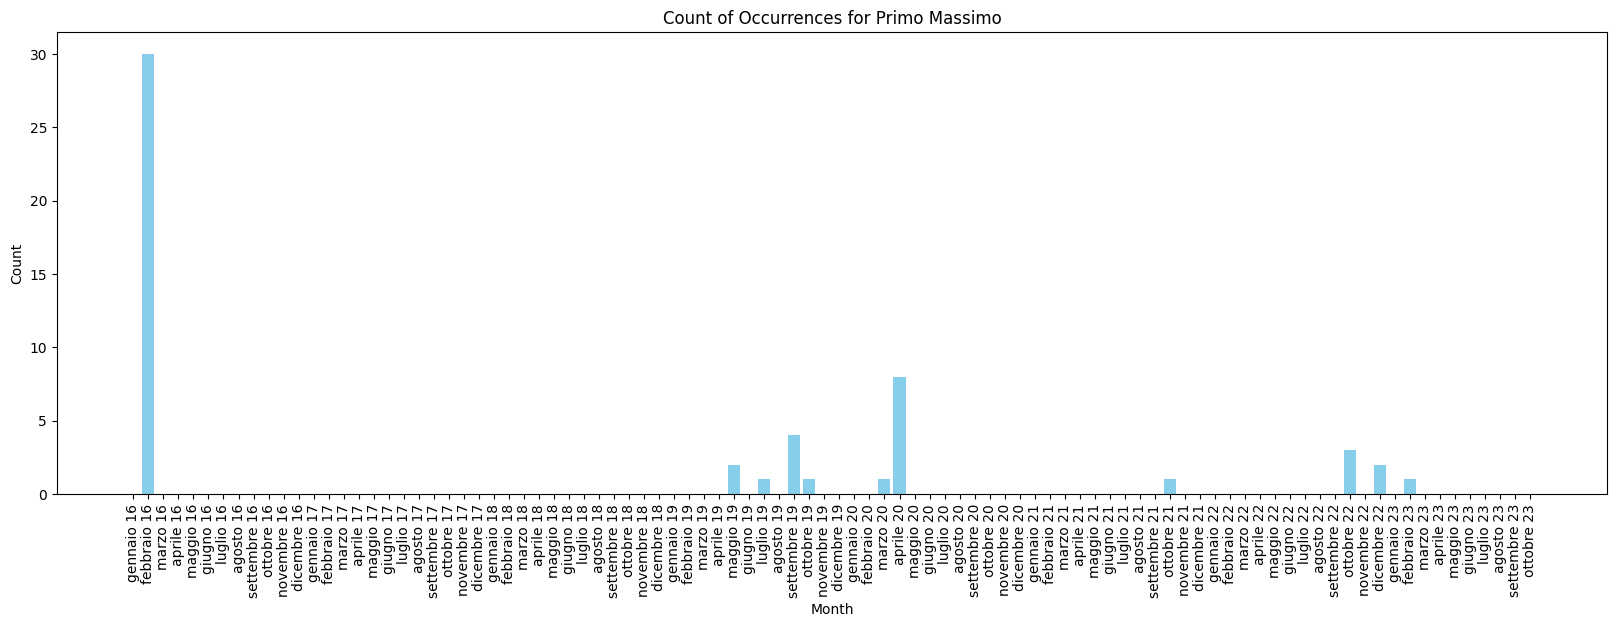

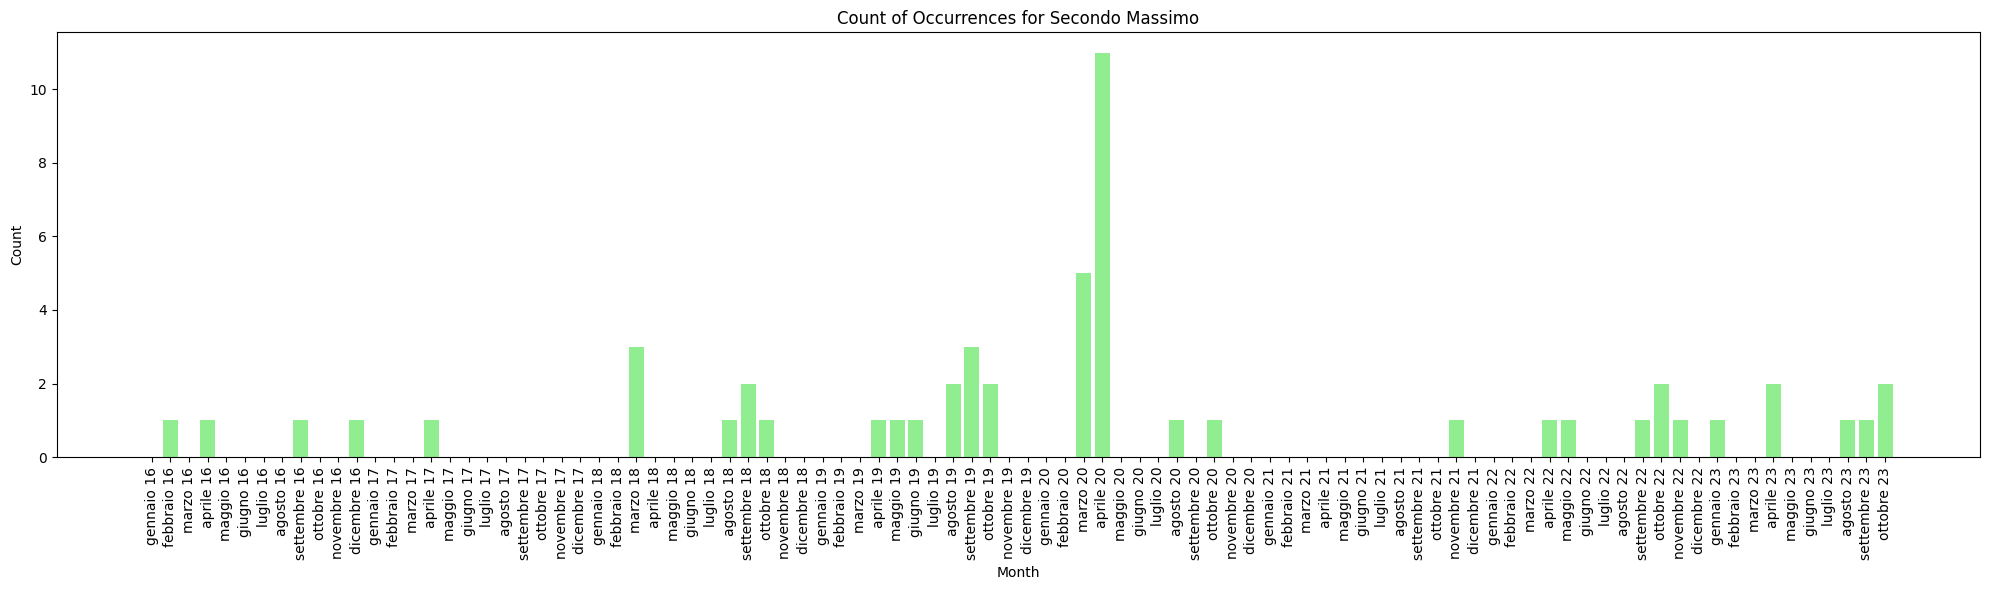

In [48]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Define the order of months
month_order = [
    'gennaio 16', 'febbraio 16', 'marzo 16', 'aprile 16', 'maggio 16', 'giugno 16', 'luglio 16', 'agosto 16',
    'settembre 16', 'ottobre 16', 'novembre 16', 'dicembre 16', 'gennaio 17', 'febbraio 17', 'marzo 17',
    'aprile 17', 'maggio 17', 'giugno 17', 'luglio 17', 'agosto 17', 'settembre 17', 'ottobre 17', 'novembre 17',
    'dicembre 17', 'gennaio 18', 'febbraio 18', 'marzo 18', 'aprile 18', 'maggio 18', 'giugno 18', 'luglio 18',
    'agosto 18', 'settembre 18', 'ottobre 18', 'novembre 18', 'dicembre 18', 'gennaio 19', 'febbraio 19', 'marzo 19',
    'aprile 19', 'maggio 19', 'giugno 19', 'luglio 19', 'agosto 19', 'settembre 19', 'ottobre 19', 'novembre 19',
    'dicembre 19', 'gennaio 20', 'febbraio 20', 'marzo 20', 'aprile 20', 'maggio 20', 'giugno 20', 'luglio 20',
    'agosto 20', 'settembre 20', 'ottobre 20', 'novembre 20', 'dicembre 20', 'gennaio 21', 'febbraio 21', 'marzo 21',
    'aprile 21', 'maggio 21', 'giugno 21', 'luglio 21', 'agosto 21', 'settembre 21', 'ottobre 21', 'novembre 21',
    'dicembre 21', 'gennaio 22', 'febbraio 22', 'marzo 22', 'aprile 22', 'maggio 22', 'giugno 22', 'luglio 22',
    'agosto 22', 'settembre 22', 'ottobre 22', 'novembre 22', 'dicembre 22', 'gennaio 23', 'febbraio 23', 'marzo 23',
    'aprile 23', 'maggio 23', 'giugno 23', 'luglio 23', 'agosto 23', 'settembre 23', 'ottobre 23'
]

# Initialize Counters for 'Primo massimo' and 'Secondo massimo'
primo_massimo_counter = Counter()
secondo_massimo_counter = Counter()

# Iterate through the DataFrame
for index, row in df.iterrows():
    primo_massimo_counter[row['Primo_massimo']] += 1
    secondo_massimo_counter[row['Secondo_massimo']] += 1

# Convert the Counter objects to dictionaries
primo_massimo_dict = dict(primo_massimo_counter)
secondo_massimo_dict = dict(secondo_massimo_counter)

# Create DataFrames from the dictionaries
primo_massimo_df = pd.DataFrame(list(primo_massimo_dict.items()), columns=['Month', 'Count'])
secondo_massimo_df = pd.DataFrame(list(secondo_massimo_dict.items()), columns=['Month', 'Count'])

# Set the 'Month' column as the index
primo_massimo_df.set_index('Month', inplace=True)
secondo_massimo_df.set_index('Month', inplace=True)

# Reindex to include all months in the specified order
primo_massimo_df = primo_massimo_df.reindex(month_order)
secondo_massimo_df = secondo_massimo_df.reindex(month_order)

# Fill NaN values with 0
primo_massimo_df.fillna(0, inplace=True)
secondo_massimo_df.fillna(0, inplace=True)

# Plot the histograms
plt.figure(figsize=(20, 6))
plt.bar(primo_massimo_df.index, primo_massimo_df['Count'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Occurrences for Primo Massimo')
plt.xticks(rotation=90)

plt.figure(figsize=(20, 6))
plt.bar(secondo_massimo_df.index, secondo_massimo_df['Count'], color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Occurrences for Secondo Massimo')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
